In [1]:
%run base.ipynb
%matplotlib inline

import iisignature
import matplotlib.pyplot as plt
import numpy as np
import sklearn.preprocessing as preprocessing
import torch
import torch.optim as optim
import torch.utils.data as torchdata

import signature_inversion
import utils

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## Hyperparameters

In [2]:
max_epochs = 5000
optimizer_fn = lambda x: optim.Adam(x, lr=0.002)

## Data

In [3]:
paths = {"zero":  "29, 97, 0, 57, 22, 10, 68, 0, 100, 40, 83, 90, 37, 100, 12, 57", "three": "37, 80, 53, 100, 88, 83, 59, 60, 100, 44, 92, 15, 49, 0, 0, 8", "six": "70, 100, 54, 86, 29, 53, 23, 16, 69, 0, 100, 23, 50, 36, 0, 21", "eight": "87, 67, 66, 100, 0, 79, 49, 45, 100, 10, 40, 0, 37, 40, 81, 78"}
path = paths["three"]
path = np.array(path.split(","), dtype=float).reshape(-1, 2)
path = preprocessing.MinMaxScaler(feature_range=(-1, 1)).fit_transform(path)

In [4]:
order = 12
sig = iisignature.sig(path, order).reshape(1, -1)
n_steps = len(path)

dataloader = torchdata.DataLoader(torchdata.TensorDataset(torch.ones(1, 1, 1),
                                                          torch.tensor(sig, dtype=torch.float)))

## Define Neural Network model

In [5]:
batch, output = next(iter(dataloader))

In [6]:
model = signature_inversion.Invert(n_steps, order, derivatives=False)

model.path.weight = torch.nn.Parameter(data=torch.zeros_like(model.path.weight))

loss_fn = signature_inversion.loss_fn(order)

## Train Model

In [7]:
history = {}
train_model = utils.create_train_model_fn(max_epochs, optimizer_fn, loss_fn, dataloader, dataloader, batch)

In [8]:
train_model(model, 'SigNet', history, device='cpu')

train mse: 81.7597 --- train loss: -1.7569 --- val mse: 81.7597 --- val loss: -1.7569
Epoch:    1            : 100%|██████████| 1/1 [00:00<00:00,  9.98it/s]
train mse: 81.7422 --- train loss: -1.7570 --- val mse: 81.7422 --- val loss: -1.7570
Epoch:    2            : 100%|██████████| 1/1 [00:00<00:00, 146.89it/s]
train mse: 81.7247 --- train loss: -1.7570 --- val mse: 81.7247 --- val loss: -1.7570
Epoch:    3            : 100%|██████████| 1/1 [00:00<00:00, 110.75it/s]
train mse: 81.7069 --- train loss: -1.7570 --- val mse: 81.7069 --- val loss: -1.7570
Epoch:    4            : 100%|██████████| 1/1 [00:00<00:00, 136.69it/s]
train mse: 81.6888 --- train loss: -1.7570 --- val mse: 81.6888 --- val loss: -1.7570
Epoch:    5            : 100%|██████████| 1/1 [00:00<00:00, 119.08it/s]
train mse: 81.6703 --- train loss: -1.7570 --- val mse: 81.6703 --- val loss: -1.7570
Epoch:    6            : 100%|██████████| 1/1 [00:00<00:00, 144.17it/s]
train mse: 81.6514 --- train loss: -1.7570 --- val ms

Epoch:   52            : 100%|██████████| 1/1 [00:00<00:00, 80.74it/s]
train mse: 79.7538 --- train loss: -1.7617 --- val mse: 79.7538 --- val loss: -1.7617
Epoch:   53            : 100%|██████████| 1/1 [00:00<00:00, 77.95it/s]
train mse: 79.6761 --- train loss: -1.7620 --- val mse: 79.6761 --- val loss: -1.7620
Epoch:   54            : 100%|██████████| 1/1 [00:00<00:00, 51.85it/s]
train mse: 79.5959 --- train loss: -1.7622 --- val mse: 79.5959 --- val loss: -1.7622
Epoch:   55            : 100%|██████████| 1/1 [00:00<00:00, 106.65it/s]
train mse: 79.5133 --- train loss: -1.7626 --- val mse: 79.5133 --- val loss: -1.7626
Epoch:   56            : 100%|██████████| 1/1 [00:00<00:00, 76.06it/s]
train mse: 79.4279 --- train loss: -1.7629 --- val mse: 79.4279 --- val loss: -1.7629
Epoch:   57            : 100%|██████████| 1/1 [00:00<00:00, 81.82it/s]
train mse: 79.3398 --- train loss: -1.7632 --- val mse: 79.3398 --- val loss: -1.7632
Epoch:   58            : 100%|██████████| 1/1 [00:00<00:0

Epoch:  104            : 100%|██████████| 1/1 [00:00<00:00, 126.25it/s]
train mse: 69.6086 --- train loss: -1.8243 --- val mse: 69.6086 --- val loss: -1.8243
Epoch:  105            : 100%|██████████| 1/1 [00:00<00:00, 142.95it/s]
train mse: 69.2238 --- train loss: -1.8273 --- val mse: 69.2238 --- val loss: -1.8273
Epoch:  106            : 100%|██████████| 1/1 [00:00<00:00, 63.06it/s]
train mse: 68.8292 --- train loss: -1.8305 --- val mse: 68.8292 --- val loss: -1.8305
Epoch:  107            : 100%|██████████| 1/1 [00:00<00:00, 152.92it/s]
train mse: 68.4247 --- train loss: -1.8338 --- val mse: 68.4247 --- val loss: -1.8338
Epoch:  108            : 100%|██████████| 1/1 [00:00<00:00, 169.23it/s]
train mse: 68.0103 --- train loss: -1.8372 --- val mse: 68.0103 --- val loss: -1.8372
Epoch:  109            : 100%|██████████| 1/1 [00:00<00:00, 156.22it/s]
train mse: 67.5858 --- train loss: -1.8408 --- val mse: 67.5858 --- val loss: -1.8408
Epoch:  110            : 100%|██████████| 1/1 [00:00<

Epoch:  156            : 100%|██████████| 1/1 [00:00<00:00, 87.05it/s]
train mse: 40.4487 --- train loss: -2.1739 --- val mse: 40.4487 --- val loss: -2.1739
Epoch:  157            : 100%|██████████| 1/1 [00:00<00:00, 125.19it/s]
train mse: 39.7322 --- train loss: -2.1877 --- val mse: 39.7322 --- val loss: -2.1877
Epoch:  158            : 100%|██████████| 1/1 [00:00<00:00, 141.92it/s]
train mse: 39.0055 --- train loss: -2.2020 --- val mse: 39.0055 --- val loss: -2.2020
Epoch:  159            : 100%|██████████| 1/1 [00:00<00:00, 133.05it/s]
train mse: 38.2686 --- train loss: -2.2168 --- val mse: 38.2686 --- val loss: -2.2168
Epoch:  160            : 100%|██████████| 1/1 [00:00<00:00, 124.18it/s]
train mse: 37.5215 --- train loss: -2.2322 --- val mse: 37.5215 --- val loss: -2.2322
Epoch:  161            : 100%|██████████| 1/1 [00:00<00:00, 128.85it/s]
train mse: 36.7644 --- train loss: -2.2483 --- val mse: 36.7644 --- val loss: -2.2483
Epoch:  162            : 100%|██████████| 1/1 [00:00<

Epoch:  208            : 100%|██████████| 1/1 [00:00<00:00, 102.59it/s]
train mse: 7.0672 --- train loss: -3.8352 --- val mse: 7.0672 --- val loss: -3.8352
Epoch:  209            : 100%|██████████| 1/1 [00:00<00:00, 152.03it/s]
train mse: 6.8174 --- train loss: -3.8749 --- val mse: 6.8174 --- val loss: -3.8749
Epoch:  210            : 100%|██████████| 1/1 [00:00<00:00, 158.85it/s]
train mse: 6.5715 --- train loss: -3.9150 --- val mse: 6.5715 --- val loss: -3.9150
Epoch:  211            : 100%|██████████| 1/1 [00:00<00:00, 156.90it/s]
train mse: 6.3294 --- train loss: -3.9556 --- val mse: 6.3294 --- val loss: -3.9556
Epoch:  212            : 100%|██████████| 1/1 [00:00<00:00, 158.54it/s]
train mse: 6.0908 --- train loss: -3.9967 --- val mse: 6.0908 --- val loss: -3.9967
Epoch:  213            : 100%|██████████| 1/1 [00:00<00:00, 166.29it/s]
train mse: 5.8560 --- train loss: -4.0384 --- val mse: 5.8560 --- val loss: -4.0384
Epoch:  214            : 100%|██████████| 1/1 [00:00<00:00, 166.

Epoch:  261            : 100%|██████████| 1/1 [00:00<00:00, 146.89it/s]
train mse: 0.5104 --- train loss: -6.1757 --- val mse: 0.5104 --- val loss: -6.1757
Epoch:  262            : 100%|██████████| 1/1 [00:00<00:00, 143.83it/s]
train mse: 0.4812 --- train loss: -6.2178 --- val mse: 0.4812 --- val loss: -6.2178
Epoch:  263            : 100%|██████████| 1/1 [00:00<00:00, 141.88it/s]
train mse: 0.4534 --- train loss: -6.2589 --- val mse: 0.4534 --- val loss: -6.2589
Epoch:  264            : 100%|██████████| 1/1 [00:00<00:00, 140.05it/s]
train mse: 0.4271 --- train loss: -6.2986 --- val mse: 0.4271 --- val loss: -6.2986
Epoch:  265            : 100%|██████████| 1/1 [00:00<00:00, 157.69it/s]
train mse: 0.4024 --- train loss: -6.3368 --- val mse: 0.4024 --- val loss: -6.3368
Epoch:  266            : 100%|██████████| 1/1 [00:00<00:00, 151.41it/s]
train mse: 0.3794 --- train loss: -6.3735 --- val mse: 0.3794 --- val loss: -6.3735
Epoch:  267            : 100%|██████████| 1/1 [00:00<00:00, 143.

Epoch:  314            : 100%|██████████| 1/1 [00:00<00:00, 133.11it/s]
train mse: 0.1975 --- train loss: -6.7291 --- val mse: 0.1975 --- val loss: -6.7291
Epoch:  315            : 100%|██████████| 1/1 [00:00<00:00, 128.73it/s]
train mse: 0.1974 --- train loss: -6.7299 --- val mse: 0.1974 --- val loss: -6.7299
Epoch:  316            : 100%|██████████| 1/1 [00:00<00:00, 145.07it/s]
train mse: 0.1974 --- train loss: -6.7307 --- val mse: 0.1974 --- val loss: -6.7307
Epoch:  317            : 100%|██████████| 1/1 [00:00<00:00, 143.44it/s]
train mse: 0.1974 --- train loss: -6.7313 --- val mse: 0.1974 --- val loss: -6.7313
Epoch:  318            : 100%|██████████| 1/1 [00:00<00:00, 96.07it/s]
train mse: 0.1973 --- train loss: -6.7320 --- val mse: 0.1973 --- val loss: -6.7320
Epoch:  319            : 100%|██████████| 1/1 [00:00<00:00, 144.09it/s]
train mse: 0.1972 --- train loss: -6.7325 --- val mse: 0.1972 --- val loss: -6.7325
Epoch:  320            : 100%|██████████| 1/1 [00:00<00:00, 134.9

Epoch:  367            : 100%|██████████| 1/1 [00:00<00:00, 125.15it/s]
train mse: 0.1945 --- train loss: -6.7569 --- val mse: 0.1945 --- val loss: -6.7569
Epoch:  368            : 100%|██████████| 1/1 [00:00<00:00, 109.35it/s]
train mse: 0.1944 --- train loss: -6.7572 --- val mse: 0.1944 --- val loss: -6.7572
Epoch:  369            : 100%|██████████| 1/1 [00:00<00:00, 104.58it/s]
train mse: 0.1944 --- train loss: -6.7575 --- val mse: 0.1944 --- val loss: -6.7575
Epoch:  370            : 100%|██████████| 1/1 [00:00<00:00, 101.39it/s]
train mse: 0.1943 --- train loss: -6.7579 --- val mse: 0.1943 --- val loss: -6.7579
Epoch:  371            : 100%|██████████| 1/1 [00:00<00:00, 115.84it/s]
train mse: 0.1943 --- train loss: -6.7582 --- val mse: 0.1943 --- val loss: -6.7582
Epoch:  372            : 100%|██████████| 1/1 [00:00<00:00, 117.76it/s]
train mse: 0.1942 --- train loss: -6.7585 --- val mse: 0.1942 --- val loss: -6.7585
Epoch:  373            : 100%|██████████| 1/1 [00:00<00:00, 126.

Epoch:  420            : 100%|██████████| 1/1 [00:00<00:00, 78.30it/s]
train mse: 0.1922 --- train loss: -6.7683 --- val mse: 0.1922 --- val loss: -6.7683
Epoch:  421            : 100%|██████████| 1/1 [00:00<00:00, 136.67it/s]
train mse: 0.1921 --- train loss: -6.7685 --- val mse: 0.1921 --- val loss: -6.7685
Epoch:  422            : 100%|██████████| 1/1 [00:00<00:00, 85.39it/s]
train mse: 0.1921 --- train loss: -6.7686 --- val mse: 0.1921 --- val loss: -6.7686
Epoch:  423            : 100%|██████████| 1/1 [00:00<00:00, 135.48it/s]
train mse: 0.1921 --- train loss: -6.7687 --- val mse: 0.1921 --- val loss: -6.7687
Epoch:  424            : 100%|██████████| 1/1 [00:00<00:00, 101.80it/s]
train mse: 0.1920 --- train loss: -6.7689 --- val mse: 0.1920 --- val loss: -6.7689
Epoch:  425            : 100%|██████████| 1/1 [00:00<00:00, 104.14it/s]
train mse: 0.1920 --- train loss: -6.7690 --- val mse: 0.1920 --- val loss: -6.7690
Epoch:  426            : 100%|██████████| 1/1 [00:00<00:00, 70.15i

Epoch:  473            : 100%|██████████| 1/1 [00:00<00:00, 123.95it/s]
train mse: 0.1903 --- train loss: -6.7735 --- val mse: 0.1903 --- val loss: -6.7735
Epoch:  474            : 100%|██████████| 1/1 [00:00<00:00, 150.83it/s]
train mse: 0.1903 --- train loss: -6.7736 --- val mse: 0.1903 --- val loss: -6.7736
Epoch:  475            : 100%|██████████| 1/1 [00:00<00:00, 92.73it/s]
train mse: 0.1902 --- train loss: -6.7736 --- val mse: 0.1902 --- val loss: -6.7736
Epoch:  476            : 100%|██████████| 1/1 [00:00<00:00, 141.98it/s]
train mse: 0.1902 --- train loss: -6.7737 --- val mse: 0.1902 --- val loss: -6.7737
Epoch:  477            : 100%|██████████| 1/1 [00:00<00:00, 94.93it/s]
train mse: 0.1902 --- train loss: -6.7738 --- val mse: 0.1902 --- val loss: -6.7738
Epoch:  478            : 100%|██████████| 1/1 [00:00<00:00, 85.85it/s]
train mse: 0.1902 --- train loss: -6.7738 --- val mse: 0.1902 --- val loss: -6.7738
Epoch:  479            : 100%|██████████| 1/1 [00:00<00:00, 91.50it

Epoch:  526            : 100%|██████████| 1/1 [00:00<00:00, 187.34it/s]
train mse: 0.1890 --- train loss: -6.7766 --- val mse: 0.1890 --- val loss: -6.7766
Epoch:  527            : 100%|██████████| 1/1 [00:00<00:00, 91.50it/s]
train mse: 0.1889 --- train loss: -6.7767 --- val mse: 0.1889 --- val loss: -6.7767
Epoch:  528            : 100%|██████████| 1/1 [00:00<00:00, 167.17it/s]
train mse: 0.1889 --- train loss: -6.7767 --- val mse: 0.1889 --- val loss: -6.7767
Epoch:  529            : 100%|██████████| 1/1 [00:00<00:00, 183.22it/s]
train mse: 0.1889 --- train loss: -6.7768 --- val mse: 0.1889 --- val loss: -6.7768
Epoch:  530            : 100%|██████████| 1/1 [00:00<00:00, 174.44it/s]
train mse: 0.1889 --- train loss: -6.7768 --- val mse: 0.1889 --- val loss: -6.7768
Epoch:  531            : 100%|██████████| 1/1 [00:00<00:00, 168.15it/s]
train mse: 0.1889 --- train loss: -6.7769 --- val mse: 0.1889 --- val loss: -6.7769
Epoch:  532            : 100%|██████████| 1/1 [00:00<00:00, 170.9

Epoch:  579            : 100%|██████████| 1/1 [00:00<00:00, 147.48it/s]
train mse: 0.1879 --- train loss: -6.7793 --- val mse: 0.1879 --- val loss: -6.7793
Epoch:  580            : 100%|██████████| 1/1 [00:00<00:00, 136.64it/s]
train mse: 0.1879 --- train loss: -6.7794 --- val mse: 0.1879 --- val loss: -6.7794
Epoch:  581            : 100%|██████████| 1/1 [00:00<00:00, 92.83it/s]
train mse: 0.1878 --- train loss: -6.7794 --- val mse: 0.1878 --- val loss: -6.7794
Epoch:  582            : 100%|██████████| 1/1 [00:00<00:00, 95.23it/s]
train mse: 0.1878 --- train loss: -6.7795 --- val mse: 0.1878 --- val loss: -6.7795
Epoch:  583            : 100%|██████████| 1/1 [00:00<00:00, 96.27it/s]
train mse: 0.1878 --- train loss: -6.7795 --- val mse: 0.1878 --- val loss: -6.7795
Epoch:  584            : 100%|██████████| 1/1 [00:00<00:00, 106.91it/s]
train mse: 0.1878 --- train loss: -6.7796 --- val mse: 0.1878 --- val loss: -6.7796
Epoch:  585            : 100%|██████████| 1/1 [00:00<00:00, 92.78it

Epoch:  632            : 100%|██████████| 1/1 [00:00<00:00, 145.09it/s]
train mse: 0.1868 --- train loss: -6.7823 --- val mse: 0.1868 --- val loss: -6.7823
Epoch:  633            : 100%|██████████| 1/1 [00:00<00:00, 75.70it/s]
train mse: 0.1868 --- train loss: -6.7824 --- val mse: 0.1868 --- val loss: -6.7824
Epoch:  634            : 100%|██████████| 1/1 [00:00<00:00, 159.14it/s]
train mse: 0.1867 --- train loss: -6.7824 --- val mse: 0.1867 --- val loss: -6.7824
Epoch:  635            : 100%|██████████| 1/1 [00:00<00:00, 74.65it/s]
train mse: 0.1867 --- train loss: -6.7825 --- val mse: 0.1867 --- val loss: -6.7825
Epoch:  636            : 100%|██████████| 1/1 [00:00<00:00, 95.64it/s]
train mse: 0.1867 --- train loss: -6.7826 --- val mse: 0.1867 --- val loss: -6.7826
Epoch:  637            : 100%|██████████| 1/1 [00:00<00:00, 91.71it/s]
train mse: 0.1867 --- train loss: -6.7826 --- val mse: 0.1867 --- val loss: -6.7826
Epoch:  638            : 100%|██████████| 1/1 [00:00<00:00, 101.00it

Epoch:  685            : 100%|██████████| 1/1 [00:00<00:00, 127.05it/s]
train mse: 0.1855 --- train loss: -6.7862 --- val mse: 0.1855 --- val loss: -6.7862
Epoch:  686            : 100%|██████████| 1/1 [00:00<00:00, 89.43it/s]
train mse: 0.1855 --- train loss: -6.7863 --- val mse: 0.1855 --- val loss: -6.7863
Epoch:  687            : 100%|██████████| 1/1 [00:00<00:00, 152.68it/s]
train mse: 0.1854 --- train loss: -6.7864 --- val mse: 0.1854 --- val loss: -6.7864
Epoch:  688            : 100%|██████████| 1/1 [00:00<00:00, 161.13it/s]
train mse: 0.1854 --- train loss: -6.7865 --- val mse: 0.1854 --- val loss: -6.7865
Epoch:  689            : 100%|██████████| 1/1 [00:00<00:00, 160.17it/s]
train mse: 0.1854 --- train loss: -6.7866 --- val mse: 0.1854 --- val loss: -6.7866
Epoch:  690            : 100%|██████████| 1/1 [00:00<00:00, 163.85it/s]
train mse: 0.1854 --- train loss: -6.7867 --- val mse: 0.1854 --- val loss: -6.7867
Epoch:  691            : 100%|██████████| 1/1 [00:00<00:00, 164.9

Epoch:  738            : 100%|██████████| 1/1 [00:00<00:00, 130.64it/s]
train mse: 0.1838 --- train loss: -6.7919 --- val mse: 0.1838 --- val loss: -6.7919
Epoch:  739            : 100%|██████████| 1/1 [00:00<00:00, 105.47it/s]
train mse: 0.1838 --- train loss: -6.7920 --- val mse: 0.1838 --- val loss: -6.7920
Epoch:  740            : 100%|██████████| 1/1 [00:00<00:00, 82.61it/s]
train mse: 0.1838 --- train loss: -6.7922 --- val mse: 0.1838 --- val loss: -6.7922
Epoch:  741            : 100%|██████████| 1/1 [00:00<00:00, 131.98it/s]
train mse: 0.1837 --- train loss: -6.7923 --- val mse: 0.1837 --- val loss: -6.7923
Epoch:  742            : 100%|██████████| 1/1 [00:00<00:00, 125.64it/s]
train mse: 0.1837 --- train loss: -6.7924 --- val mse: 0.1837 --- val loss: -6.7924
Epoch:  743            : 100%|██████████| 1/1 [00:00<00:00, 73.54it/s]
train mse: 0.1836 --- train loss: -6.7926 --- val mse: 0.1836 --- val loss: -6.7926
Epoch:  744            : 100%|██████████| 1/1 [00:00<00:00, 141.28

Epoch:  791            : 100%|██████████| 1/1 [00:00<00:00, 95.80it/s]
train mse: 0.1815 --- train loss: -6.8008 --- val mse: 0.1815 --- val loss: -6.8008
Epoch:  792            : 100%|██████████| 1/1 [00:00<00:00, 139.16it/s]
train mse: 0.1814 --- train loss: -6.8010 --- val mse: 0.1814 --- val loss: -6.8010
Epoch:  793            : 100%|██████████| 1/1 [00:00<00:00, 104.39it/s]
train mse: 0.1814 --- train loss: -6.8012 --- val mse: 0.1814 --- val loss: -6.8012
Epoch:  794            : 100%|██████████| 1/1 [00:00<00:00, 79.98it/s]
train mse: 0.1813 --- train loss: -6.8014 --- val mse: 0.1813 --- val loss: -6.8014
Epoch:  795            : 100%|██████████| 1/1 [00:00<00:00, 79.55it/s]
train mse: 0.1813 --- train loss: -6.8016 --- val mse: 0.1813 --- val loss: -6.8016
Epoch:  796            : 100%|██████████| 1/1 [00:00<00:00, 139.53it/s]
train mse: 0.1812 --- train loss: -6.8018 --- val mse: 0.1812 --- val loss: -6.8018
Epoch:  797            : 100%|██████████| 1/1 [00:00<00:00, 87.52it

Epoch:  844            : 100%|██████████| 1/1 [00:00<00:00, 92.59it/s]
train mse: 0.1780 --- train loss: -6.8154 --- val mse: 0.1780 --- val loss: -6.8154
Epoch:  845            : 100%|██████████| 1/1 [00:00<00:00, 104.11it/s]
train mse: 0.1779 --- train loss: -6.8157 --- val mse: 0.1779 --- val loss: -6.8157
Epoch:  846            : 100%|██████████| 1/1 [00:00<00:00, 101.45it/s]
train mse: 0.1778 --- train loss: -6.8161 --- val mse: 0.1778 --- val loss: -6.8161
Epoch:  847            : 100%|██████████| 1/1 [00:00<00:00, 130.12it/s]
train mse: 0.1778 --- train loss: -6.8165 --- val mse: 0.1778 --- val loss: -6.8165
Epoch:  848            : 100%|██████████| 1/1 [00:00<00:00, 138.88it/s]
train mse: 0.1777 --- train loss: -6.8168 --- val mse: 0.1777 --- val loss: -6.8168
Epoch:  849            : 100%|██████████| 1/1 [00:00<00:00, 111.17it/s]
train mse: 0.1776 --- train loss: -6.8172 --- val mse: 0.1776 --- val loss: -6.8172
Epoch:  850            : 100%|██████████| 1/1 [00:00<00:00, 101.2

train mse: 0.1727 --- train loss: -6.8398 --- val mse: 0.1727 --- val loss: -6.8398
Epoch:  897            : 100%|██████████| 1/1 [00:00<00:00, 74.43it/s]
train mse: 0.1725 --- train loss: -6.8404 --- val mse: 0.1725 --- val loss: -6.8404
Epoch:  898            : 100%|██████████| 1/1 [00:00<00:00, 84.50it/s]
train mse: 0.1724 --- train loss: -6.8410 --- val mse: 0.1724 --- val loss: -6.8410
Epoch:  899            : 100%|██████████| 1/1 [00:00<00:00, 111.66it/s]
train mse: 0.1723 --- train loss: -6.8416 --- val mse: 0.1723 --- val loss: -6.8416
Epoch:  900            : 100%|██████████| 1/1 [00:00<00:00, 104.98it/s]
train mse: 0.1721 --- train loss: -6.8423 --- val mse: 0.1721 --- val loss: -6.8423
Epoch:  901            : 100%|██████████| 1/1 [00:00<00:00, 89.80it/s]
train mse: 0.1720 --- train loss: -6.8429 --- val mse: 0.1720 --- val loss: -6.8429
Epoch:  902            : 100%|██████████| 1/1 [00:00<00:00, 81.22it/s]
train mse: 0.1719 --- train loss: -6.8435 --- val mse: 0.1719 --- va

Epoch:  949            : 100%|██████████| 1/1 [00:00<00:00, 122.20it/s]
train mse: 0.1642 --- train loss: -6.8816 --- val mse: 0.1642 --- val loss: -6.8816
Epoch:  950            : 100%|██████████| 1/1 [00:00<00:00, 130.88it/s]
train mse: 0.1640 --- train loss: -6.8826 --- val mse: 0.1640 --- val loss: -6.8826
Epoch:  951            : 100%|██████████| 1/1 [00:00<00:00, 170.02it/s]
train mse: 0.1638 --- train loss: -6.8836 --- val mse: 0.1638 --- val loss: -6.8836
Epoch:  952            : 100%|██████████| 1/1 [00:00<00:00, 125.47it/s]
train mse: 0.1636 --- train loss: -6.8846 --- val mse: 0.1636 --- val loss: -6.8846
Epoch:  953            : 100%|██████████| 1/1 [00:00<00:00, 122.29it/s]
train mse: 0.1634 --- train loss: -6.8857 --- val mse: 0.1634 --- val loss: -6.8857
Epoch:  954            : 100%|██████████| 1/1 [00:00<00:00, 105.20it/s]
train mse: 0.1632 --- train loss: -6.8867 --- val mse: 0.1632 --- val loss: -6.8867
Epoch:  955            : 100%|██████████| 1/1 [00:00<00:00, 155.

Epoch: 1002            : 100%|██████████| 1/1 [00:00<00:00, 97.94it/s]
train mse: 0.1515 --- train loss: -6.9485 --- val mse: 0.1515 --- val loss: -6.9485
Epoch: 1003            : 100%|██████████| 1/1 [00:00<00:00, 84.72it/s]
train mse: 0.1512 --- train loss: -6.9500 --- val mse: 0.1512 --- val loss: -6.9500
Epoch: 1004            : 100%|██████████| 1/1 [00:00<00:00, 138.42it/s]
train mse: 0.1509 --- train loss: -6.9517 --- val mse: 0.1509 --- val loss: -6.9517
Epoch: 1005            : 100%|██████████| 1/1 [00:00<00:00, 143.09it/s]
train mse: 0.1506 --- train loss: -6.9533 --- val mse: 0.1506 --- val loss: -6.9533
Epoch: 1006            : 100%|██████████| 1/1 [00:00<00:00, 77.60it/s]
train mse: 0.1503 --- train loss: -6.9549 --- val mse: 0.1503 --- val loss: -6.9549
Epoch: 1007            : 100%|██████████| 1/1 [00:00<00:00, 40.69it/s]
train mse: 0.1500 --- train loss: -6.9566 --- val mse: 0.1500 --- val loss: -6.9566
Epoch: 1008            : 100%|██████████| 1/1 [00:00<00:00, 79.93it/

Epoch: 1055            : 100%|██████████| 1/1 [00:00<00:00, 121.08it/s]
train mse: 0.1339 --- train loss: -7.0564 --- val mse: 0.1339 --- val loss: -7.0564
Epoch: 1056            : 100%|██████████| 1/1 [00:00<00:00, 113.37it/s]
train mse: 0.1334 --- train loss: -7.0590 --- val mse: 0.1334 --- val loss: -7.0590
Epoch: 1057            : 100%|██████████| 1/1 [00:00<00:00, 77.88it/s]
train mse: 0.1331 --- train loss: -7.0618 --- val mse: 0.1331 --- val loss: -7.0618
Epoch: 1058            : 100%|██████████| 1/1 [00:00<00:00, 104.49it/s]
train mse: 0.1327 --- train loss: -7.0645 --- val mse: 0.1327 --- val loss: -7.0645
Epoch: 1059            : 100%|██████████| 1/1 [00:00<00:00, 117.10it/s]
train mse: 0.1323 --- train loss: -7.0673 --- val mse: 0.1323 --- val loss: -7.0673
Epoch: 1060            : 100%|██████████| 1/1 [00:00<00:00, 134.24it/s]
train mse: 0.1319 --- train loss: -7.0702 --- val mse: 0.1319 --- val loss: -7.0702
Epoch: 1061            : 100%|██████████| 1/1 [00:00<00:00, 151.5

Epoch: 1108            : 100%|██████████| 1/1 [00:00<00:00, 77.84it/s]
train mse: 0.1038 --- train loss: -7.2919 --- val mse: 0.1038 --- val loss: -7.2919
Epoch: 1109            : 100%|██████████| 1/1 [00:00<00:00, 104.58it/s]
train mse: 0.1030 --- train loss: -7.2998 --- val mse: 0.1030 --- val loss: -7.2998
Epoch: 1110            : 100%|██████████| 1/1 [00:00<00:00, 102.57it/s]
train mse: 0.1030 --- train loss: -7.3065 --- val mse: 0.1030 --- val loss: -7.3065
Epoch: 1111            : 100%|██████████| 1/1 [00:00<00:00, 72.87it/s]
train mse: 0.1018 --- train loss: -7.3146 --- val mse: 0.1018 --- val loss: -7.3146
Epoch: 1112            : 100%|██████████| 1/1 [00:00<00:00, 123.41it/s]
train mse: 0.1013 --- train loss: -7.3155 --- val mse: 0.1013 --- val loss: -7.3155
Epoch: 1113            : 100%|██████████| 1/1 [00:00<00:00, 159.52it/s]
train mse: 0.1010 --- train loss: -7.3196 --- val mse: 0.1010 --- val loss: -7.3196
Epoch: 1114            : 100%|██████████| 1/1 [00:00<00:00, 158.06

Epoch: 1161            : 100%|██████████| 1/1 [00:00<00:00, 124.16it/s]
train mse: 0.0720 --- train loss: -7.6307 --- val mse: 0.0720 --- val loss: -7.6307
Epoch: 1162            : 100%|██████████| 1/1 [00:00<00:00, 59.99it/s]
train mse: 0.0711 --- train loss: -7.6422 --- val mse: 0.0711 --- val loss: -7.6422
Epoch: 1163            : 100%|██████████| 1/1 [00:00<00:00, 90.25it/s]
train mse: 0.0706 --- train loss: -7.6532 --- val mse: 0.0706 --- val loss: -7.6532
Epoch: 1164            : 100%|██████████| 1/1 [00:00<00:00, 86.02it/s]
train mse: 0.0696 --- train loss: -7.6641 --- val mse: 0.0696 --- val loss: -7.6641
Epoch: 1165            : 100%|██████████| 1/1 [00:00<00:00, 86.50it/s]
train mse: 0.0686 --- train loss: -7.6761 --- val mse: 0.0686 --- val loss: -7.6761
Epoch: 1166            : 100%|██████████| 1/1 [00:00<00:00, 91.12it/s]
train mse: 0.0681 --- train loss: -7.6837 --- val mse: 0.0681 --- val loss: -7.6837
Epoch: 1167            : 100%|██████████| 1/1 [00:00<00:00, 135.61it/

Epoch: 1214            : 100%|██████████| 1/1 [00:00<00:00, 179.20it/s]
train mse: 0.0437 --- train loss: -8.0471 --- val mse: 0.0437 --- val loss: -8.0471
Epoch: 1215            : 100%|██████████| 1/1 [00:00<00:00, 141.22it/s]
train mse: 0.0438 --- train loss: -8.0501 --- val mse: 0.0438 --- val loss: -8.0501
Epoch: 1216            : 100%|██████████| 1/1 [00:00<00:00, 122.18it/s]
train mse: 0.0434 --- train loss: -8.0561 --- val mse: 0.0434 --- val loss: -8.0561
Epoch: 1217            : 100%|██████████| 1/1 [00:00<00:00, 193.45it/s]
train mse: 0.0431 --- train loss: -8.0536 --- val mse: 0.0431 --- val loss: -8.0536
Epoch: 1218            : 100%|██████████| 1/1 [00:00<00:00, 157.88it/s]
train mse: 0.0431 --- train loss: -8.0534 --- val mse: 0.0431 --- val loss: -8.0534
Epoch: 1219            : 100%|██████████| 1/1 [00:00<00:00, 178.85it/s]
train mse: 0.0424 --- train loss: -8.0672 --- val mse: 0.0424 --- val loss: -8.0672
Epoch: 1220            : 100%|██████████| 1/1 [00:00<00:00, 146.

Epoch: 1267            : 100%|██████████| 1/1 [00:00<00:00, 160.20it/s]
train mse: 0.0377 --- train loss: -8.1649 --- val mse: 0.0377 --- val loss: -8.1649
Epoch: 1268            : 100%|██████████| 1/1 [00:00<00:00, 149.86it/s]
train mse: 0.0380 --- train loss: -8.1642 --- val mse: 0.0380 --- val loss: -8.1642
Epoch: 1269            : 100%|██████████| 1/1 [00:00<00:00, 154.49it/s]
train mse: 0.0375 --- train loss: -8.1678 --- val mse: 0.0375 --- val loss: -8.1678
Epoch: 1270            : 100%|██████████| 1/1 [00:00<00:00, 154.58it/s]
train mse: 0.0376 --- train loss: -8.1645 --- val mse: 0.0376 --- val loss: -8.1645
Epoch: 1271            : 100%|██████████| 1/1 [00:00<00:00, 153.56it/s]
train mse: 0.0376 --- train loss: -8.1646 --- val mse: 0.0376 --- val loss: -8.1646
Epoch: 1272            : 100%|██████████| 1/1 [00:00<00:00, 150.41it/s]
train mse: 0.0374 --- train loss: -8.1718 --- val mse: 0.0374 --- val loss: -8.1718
Epoch: 1273            : 100%|██████████| 1/1 [00:00<00:00, 146.

Epoch: 1320            : 100%|██████████| 1/1 [00:00<00:00, 134.97it/s]
train mse: 0.0344 --- train loss: -8.2358 --- val mse: 0.0344 --- val loss: -8.2358
Epoch: 1321            : 100%|██████████| 1/1 [00:00<00:00, 177.12it/s]
train mse: 0.0351 --- train loss: -8.2328 --- val mse: 0.0351 --- val loss: -8.2328
Epoch: 1322            : 100%|██████████| 1/1 [00:00<00:00, 182.59it/s]
train mse: 0.0352 --- train loss: -8.2328 --- val mse: 0.0352 --- val loss: -8.2328
Epoch: 1323            : 100%|██████████| 1/1 [00:00<00:00, 142.14it/s]
train mse: 0.0346 --- train loss: -8.2387 --- val mse: 0.0346 --- val loss: -8.2387
Epoch: 1324            : 100%|██████████| 1/1 [00:00<00:00, 142.15it/s]
train mse: 0.0344 --- train loss: -8.2355 --- val mse: 0.0344 --- val loss: -8.2355
Epoch: 1325            : 100%|██████████| 1/1 [00:00<00:00, 143.15it/s]
train mse: 0.0345 --- train loss: -8.2327 --- val mse: 0.0345 --- val loss: -8.2327
Epoch: 1326            : 100%|██████████| 1/1 [00:00<00:00, 158.

Epoch: 1373            : 100%|██████████| 1/1 [00:00<00:00, 128.65it/s]
train mse: 0.0323 --- train loss: -8.2966 --- val mse: 0.0323 --- val loss: -8.2966
Epoch: 1374            : 100%|██████████| 1/1 [00:00<00:00, 119.88it/s]
train mse: 0.0320 --- train loss: -8.2993 --- val mse: 0.0320 --- val loss: -8.2993
Epoch: 1375            : 100%|██████████| 1/1 [00:00<00:00, 107.80it/s]
train mse: 0.0321 --- train loss: -8.3001 --- val mse: 0.0321 --- val loss: -8.3001
Epoch: 1376            : 100%|██████████| 1/1 [00:00<00:00, 118.21it/s]
train mse: 0.0320 --- train loss: -8.3023 --- val mse: 0.0320 --- val loss: -8.3023
Epoch: 1377            : 100%|██████████| 1/1 [00:00<00:00, 62.04it/s]
train mse: 0.0318 --- train loss: -8.3021 --- val mse: 0.0318 --- val loss: -8.3021
Epoch: 1378            : 100%|██████████| 1/1 [00:00<00:00, 79.09it/s]
train mse: 0.0318 --- train loss: -8.3038 --- val mse: 0.0318 --- val loss: -8.3038
Epoch: 1379            : 100%|██████████| 1/1 [00:00<00:00, 151.59

Epoch: 1426            : 100%|██████████| 1/1 [00:00<00:00, 84.40it/s]
train mse: 0.0298 --- train loss: -8.3655 --- val mse: 0.0298 --- val loss: -8.3655
Epoch: 1427            : 100%|██████████| 1/1 [00:00<00:00, 130.56it/s]
train mse: 0.0304 --- train loss: -8.3538 --- val mse: 0.0304 --- val loss: -8.3538
Epoch: 1428            : 100%|██████████| 1/1 [00:00<00:00, 144.25it/s]
train mse: 0.0303 --- train loss: -8.3576 --- val mse: 0.0303 --- val loss: -8.3576
Epoch: 1429            : 100%|██████████| 1/1 [00:00<00:00, 120.98it/s]
train mse: 0.0296 --- train loss: -8.3718 --- val mse: 0.0296 --- val loss: -8.3718
Epoch: 1430            : 100%|██████████| 1/1 [00:00<00:00, 88.80it/s]
train mse: 0.0299 --- train loss: -8.3740 --- val mse: 0.0299 --- val loss: -8.3740
Epoch: 1431            : 100%|██████████| 1/1 [00:00<00:00, 110.38it/s]
train mse: 0.0305 --- train loss: -8.3672 --- val mse: 0.0305 --- val loss: -8.3672
Epoch: 1432            : 100%|██████████| 1/1 [00:00<00:00, 156.80

Epoch: 1479            : 100%|██████████| 1/1 [00:00<00:00, 124.32it/s]
train mse: 0.0273 --- train loss: -8.4443 --- val mse: 0.0273 --- val loss: -8.4443
Epoch: 1480            : 100%|██████████| 1/1 [00:00<00:00, 169.58it/s]
train mse: 0.0275 --- train loss: -8.4451 --- val mse: 0.0275 --- val loss: -8.4451
Epoch: 1481            : 100%|██████████| 1/1 [00:00<00:00, 184.28it/s]
train mse: 0.0274 --- train loss: -8.4479 --- val mse: 0.0274 --- val loss: -8.4479
Epoch: 1482            : 100%|██████████| 1/1 [00:00<00:00, 104.64it/s]
train mse: 0.0272 --- train loss: -8.4477 --- val mse: 0.0272 --- val loss: -8.4477
Epoch: 1483            : 100%|██████████| 1/1 [00:00<00:00, 99.64it/s]
train mse: 0.0271 --- train loss: -8.4496 --- val mse: 0.0271 --- val loss: -8.4496
Epoch: 1484            : 100%|██████████| 1/1 [00:00<00:00, 104.08it/s]
train mse: 0.0272 --- train loss: -8.4526 --- val mse: 0.0272 --- val loss: -8.4526
Epoch: 1485            : 100%|██████████| 1/1 [00:00<00:00, 129.8

Epoch: 1532            : 100%|██████████| 1/1 [00:00<00:00, 156.47it/s]
train mse: 0.0245 --- train loss: -8.5580 --- val mse: 0.0245 --- val loss: -8.5580
Epoch: 1533            : 100%|██████████| 1/1 [00:00<00:00, 149.25it/s]
train mse: 0.0242 --- train loss: -8.5646 --- val mse: 0.0242 --- val loss: -8.5646
Epoch: 1534            : 100%|██████████| 1/1 [00:00<00:00, 149.31it/s]
train mse: 0.0242 --- train loss: -8.5610 --- val mse: 0.0242 --- val loss: -8.5610
Epoch: 1535            : 100%|██████████| 1/1 [00:00<00:00, 131.79it/s]
train mse: 0.0243 --- train loss: -8.5581 --- val mse: 0.0243 --- val loss: -8.5581
Epoch: 1536            : 100%|██████████| 1/1 [00:00<00:00, 153.48it/s]
train mse: 0.0240 --- train loss: -8.5679 --- val mse: 0.0240 --- val loss: -8.5679
Epoch: 1537            : 100%|██████████| 1/1 [00:00<00:00, 172.44it/s]
train mse: 0.0242 --- train loss: -8.5694 --- val mse: 0.0242 --- val loss: -8.5694
Epoch: 1538            : 100%|██████████| 1/1 [00:00<00:00, 136.

Epoch: 1585            : 100%|██████████| 1/1 [00:00<00:00, 169.94it/s]
train mse: 0.0198 --- train loss: -8.7568 --- val mse: 0.0198 --- val loss: -8.7568
Epoch: 1586            : 100%|██████████| 1/1 [00:00<00:00, 139.20it/s]
train mse: 0.0196 --- train loss: -8.7591 --- val mse: 0.0196 --- val loss: -8.7591
Epoch: 1587            : 100%|██████████| 1/1 [00:00<00:00, 155.74it/s]
train mse: 0.0194 --- train loss: -8.7640 --- val mse: 0.0194 --- val loss: -8.7640
Epoch: 1588            : 100%|██████████| 1/1 [00:00<00:00, 134.70it/s]
train mse: 0.0195 --- train loss: -8.7682 --- val mse: 0.0195 --- val loss: -8.7682
Epoch: 1589            : 100%|██████████| 1/1 [00:00<00:00, 136.35it/s]
train mse: 0.0196 --- train loss: -8.7710 --- val mse: 0.0196 --- val loss: -8.7710
Epoch: 1590            : 100%|██████████| 1/1 [00:00<00:00, 136.50it/s]
train mse: 0.0192 --- train loss: -8.7783 --- val mse: 0.0192 --- val loss: -8.7783
Epoch: 1591            : 100%|██████████| 1/1 [00:00<00:00, 114.

Epoch: 1638            : 100%|██████████| 1/1 [00:00<00:00, 129.00it/s]
train mse: 0.0152 --- train loss: -9.0085 --- val mse: 0.0152 --- val loss: -9.0085
Epoch: 1639            : 100%|██████████| 1/1 [00:00<00:00, 135.91it/s]
train mse: 0.0152 --- train loss: -9.0133 --- val mse: 0.0152 --- val loss: -9.0133
Epoch: 1640            : 100%|██████████| 1/1 [00:00<00:00, 154.58it/s]
train mse: 0.0148 --- train loss: -9.0250 --- val mse: 0.0148 --- val loss: -9.0250
Epoch: 1641            : 100%|██████████| 1/1 [00:00<00:00, 147.75it/s]
train mse: 0.0147 --- train loss: -9.0275 --- val mse: 0.0147 --- val loss: -9.0275
Epoch: 1642            : 100%|██████████| 1/1 [00:00<00:00, 98.36it/s]
train mse: 0.0147 --- train loss: -9.0301 --- val mse: 0.0147 --- val loss: -9.0301
Epoch: 1643            : 100%|██████████| 1/1 [00:00<00:00, 119.13it/s]
train mse: 0.0145 --- train loss: -9.0412 --- val mse: 0.0145 --- val loss: -9.0412
Epoch: 1644            : 100%|██████████| 1/1 [00:00<00:00, 133.9

Epoch: 1691            : 100%|██████████| 1/1 [00:00<00:00, 133.91it/s]
train mse: 0.0109 --- train loss: -9.3215 --- val mse: 0.0109 --- val loss: -9.3215
Epoch: 1692            : 100%|██████████| 1/1 [00:00<00:00, 141.37it/s]
train mse: 0.0111 --- train loss: -9.3188 --- val mse: 0.0111 --- val loss: -9.3188
Epoch: 1693            : 100%|██████████| 1/1 [00:00<00:00, 141.71it/s]
train mse: 0.0109 --- train loss: -9.3265 --- val mse: 0.0109 --- val loss: -9.3265
Epoch: 1694            : 100%|██████████| 1/1 [00:00<00:00, 121.66it/s]
train mse: 0.0106 --- train loss: -9.3364 --- val mse: 0.0106 --- val loss: -9.3364
Epoch: 1695            : 100%|██████████| 1/1 [00:00<00:00, 118.37it/s]
train mse: 0.0106 --- train loss: -9.3367 --- val mse: 0.0106 --- val loss: -9.3367
Epoch: 1696            : 100%|██████████| 1/1 [00:00<00:00, 142.56it/s]
train mse: 0.0105 --- train loss: -9.3442 --- val mse: 0.0105 --- val loss: -9.3442
Epoch: 1697            : 100%|██████████| 1/1 [00:00<00:00, 118.

train mse: 0.0085 --- train loss: -9.5422 --- val mse: 0.0085 --- val loss: -9.5422
Epoch: 1744            : 100%|██████████| 1/1 [00:00<00:00, 110.23it/s]
train mse: 0.0085 --- train loss: -9.5433 --- val mse: 0.0085 --- val loss: -9.5433
Epoch: 1745            : 100%|██████████| 1/1 [00:00<00:00, 124.62it/s]
train mse: 0.0084 --- train loss: -9.5581 --- val mse: 0.0084 --- val loss: -9.5581
Epoch: 1746            : 100%|██████████| 1/1 [00:00<00:00, 124.28it/s]
train mse: 0.0087 --- train loss: -9.5458 --- val mse: 0.0087 --- val loss: -9.5458
Epoch: 1747            : 100%|██████████| 1/1 [00:00<00:00, 120.05it/s]
train mse: 0.0086 --- train loss: -9.5529 --- val mse: 0.0086 --- val loss: -9.5529
Epoch: 1748            : 100%|██████████| 1/1 [00:00<00:00, 87.03it/s]
train mse: 0.0083 --- train loss: -9.5613 --- val mse: 0.0083 --- val loss: -9.5613
Epoch: 1749            : 100%|██████████| 1/1 [00:00<00:00, 99.78it/s]
train mse: 0.0085 --- train loss: -9.5574 --- val mse: 0.0085 --- 

Epoch: 1796            : 100%|██████████| 1/1 [00:00<00:00, 148.72it/s]
train mse: 0.0078 --- train loss: -9.6334 --- val mse: 0.0078 --- val loss: -9.6334
Epoch: 1797            : 100%|██████████| 1/1 [00:00<00:00, 126.99it/s]
train mse: 0.0077 --- train loss: -9.6384 --- val mse: 0.0077 --- val loss: -9.6384
Epoch: 1798            : 100%|██████████| 1/1 [00:00<00:00, 135.51it/s]
train mse: 0.0078 --- train loss: -9.6332 --- val mse: 0.0078 --- val loss: -9.6332
Epoch: 1799            : 100%|██████████| 1/1 [00:00<00:00, 105.08it/s]
train mse: 0.0078 --- train loss: -9.6349 --- val mse: 0.0078 --- val loss: -9.6349
Epoch: 1800            : 100%|██████████| 1/1 [00:00<00:00, 147.04it/s]
train mse: 0.0077 --- train loss: -9.6427 --- val mse: 0.0077 --- val loss: -9.6427
Epoch: 1801            : 100%|██████████| 1/1 [00:00<00:00, 116.96it/s]
train mse: 0.0077 --- train loss: -9.6410 --- val mse: 0.0077 --- val loss: -9.6410
Epoch: 1802            : 100%|██████████| 1/1 [00:00<00:00, 114.

Epoch: 1849            : 100%|██████████| 1/1 [00:00<00:00, 169.13it/s]
train mse: 0.0071 --- train loss: -9.7095 --- val mse: 0.0071 --- val loss: -9.7095
Epoch: 1850            : 100%|██████████| 1/1 [00:00<00:00, 166.00it/s]
train mse: 0.0072 --- train loss: -9.7031 --- val mse: 0.0072 --- val loss: -9.7031
Epoch: 1851            : 100%|██████████| 1/1 [00:00<00:00, 158.67it/s]
train mse: 0.0072 --- train loss: -9.7079 --- val mse: 0.0072 --- val loss: -9.7079
Epoch: 1852            : 100%|██████████| 1/1 [00:00<00:00, 171.22it/s]
train mse: 0.0073 --- train loss: -9.7079 --- val mse: 0.0073 --- val loss: -9.7079
Epoch: 1853            : 100%|██████████| 1/1 [00:00<00:00, 144.11it/s]
train mse: 0.0073 --- train loss: -9.7059 --- val mse: 0.0073 --- val loss: -9.7059
Epoch: 1854            : 100%|██████████| 1/1 [00:00<00:00, 126.59it/s]
train mse: 0.0070 --- train loss: -9.7140 --- val mse: 0.0070 --- val loss: -9.7140
Epoch: 1855            : 100%|██████████| 1/1 [00:00<00:00, 105.

Epoch: 1902            : 100%|██████████| 1/1 [00:00<00:00, 152.03it/s]
train mse: 0.0067 --- train loss: -9.7695 --- val mse: 0.0067 --- val loss: -9.7695
Epoch: 1903            : 100%|██████████| 1/1 [00:00<00:00, 153.69it/s]
train mse: 0.0069 --- train loss: -9.7631 --- val mse: 0.0069 --- val loss: -9.7631
Epoch: 1904            : 100%|██████████| 1/1 [00:00<00:00, 93.65it/s]
train mse: 0.0073 --- train loss: -9.7465 --- val mse: 0.0073 --- val loss: -9.7465
Epoch: 1905            : 100%|██████████| 1/1 [00:00<00:00, 112.58it/s]
train mse: 0.0071 --- train loss: -9.7571 --- val mse: 0.0071 --- val loss: -9.7571
Epoch: 1906            : 100%|██████████| 1/1 [00:00<00:00, 92.46it/s]
train mse: 0.0066 --- train loss: -9.7769 --- val mse: 0.0066 --- val loss: -9.7769
Epoch: 1907            : 100%|██████████| 1/1 [00:00<00:00, 73.15it/s]
train mse: 0.0070 --- train loss: -9.7502 --- val mse: 0.0070 --- val loss: -9.7502
Epoch: 1908            : 100%|██████████| 1/1 [00:00<00:00, 157.97i

Epoch: 1955            : 100%|██████████| 1/1 [00:00<00:00, 127.74it/s]
train mse: 0.0066 --- train loss: -9.8055 --- val mse: 0.0066 --- val loss: -9.8055
Epoch: 1956            : 100%|██████████| 1/1 [00:00<00:00, 115.16it/s]
train mse: 0.0067 --- train loss: -9.7980 --- val mse: 0.0067 --- val loss: -9.7980
Epoch: 1957            : 100%|██████████| 1/1 [00:00<00:00, 127.21it/s]
train mse: 0.0065 --- train loss: -9.8083 --- val mse: 0.0065 --- val loss: -9.8083
Epoch: 1958            : 100%|██████████| 1/1 [00:00<00:00, 151.38it/s]
train mse: 0.0064 --- train loss: -9.8054 --- val mse: 0.0064 --- val loss: -9.8054
Epoch: 1959            : 100%|██████████| 1/1 [00:00<00:00, 114.78it/s]
train mse: 0.0064 --- train loss: -9.8008 --- val mse: 0.0064 --- val loss: -9.8008
Epoch: 1960            : 100%|██████████| 1/1 [00:00<00:00, 154.73it/s]
train mse: 0.0064 --- train loss: -9.8111 --- val mse: 0.0064 --- val loss: -9.8111
Epoch: 1961            : 100%|██████████| 1/1 [00:00<00:00, 161.

Epoch: 2008            : 100%|██████████| 1/1 [00:00<00:00, 103.60it/s]
train mse: 0.0062 --- train loss: -9.8386 --- val mse: 0.0062 --- val loss: -9.8386
Epoch: 2009            : 100%|██████████| 1/1 [00:00<00:00, 156.90it/s]
train mse: 0.0067 --- train loss: -9.8122 --- val mse: 0.0067 --- val loss: -9.8122
Epoch: 2010            : 100%|██████████| 1/1 [00:00<00:00, 155.31it/s]
train mse: 0.0070 --- train loss: -9.7958 --- val mse: 0.0070 --- val loss: -9.7958
Epoch: 2011            : 100%|██████████| 1/1 [00:00<00:00, 115.55it/s]
train mse: 0.0064 --- train loss: -9.8296 --- val mse: 0.0064 --- val loss: -9.8296
Epoch: 2012            : 100%|██████████| 1/1 [00:00<00:00, 70.55it/s]
train mse: 0.0063 --- train loss: -9.8271 --- val mse: 0.0063 --- val loss: -9.8271
Epoch: 2013            : 100%|██████████| 1/1 [00:00<00:00, 130.56it/s]
train mse: 0.0067 --- train loss: -9.8045 --- val mse: 0.0067 --- val loss: -9.8045
Epoch: 2014            : 100%|██████████| 1/1 [00:00<00:00, 116.7

Epoch: 2061            : 100%|██████████| 1/1 [00:00<00:00, 144.73it/s]
train mse: 0.0063 --- train loss: -9.8537 --- val mse: 0.0063 --- val loss: -9.8537
Epoch: 2062            : 100%|██████████| 1/1 [00:00<00:00, 50.04it/s]
train mse: 0.0063 --- train loss: -9.8532 --- val mse: 0.0063 --- val loss: -9.8532
Epoch: 2063            : 100%|██████████| 1/1 [00:00<00:00, 148.10it/s]
train mse: 0.0060 --- train loss: -9.8654 --- val mse: 0.0060 --- val loss: -9.8654
Epoch: 2064            : 100%|██████████| 1/1 [00:00<00:00, 134.36it/s]
train mse: 0.0065 --- train loss: -9.8417 --- val mse: 0.0065 --- val loss: -9.8417
Epoch: 2065            : 100%|██████████| 1/1 [00:00<00:00, 116.62it/s]
train mse: 0.0066 --- train loss: -9.8307 --- val mse: 0.0066 --- val loss: -9.8307
Epoch: 2066            : 100%|██████████| 1/1 [00:00<00:00, 123.94it/s]
train mse: 0.0062 --- train loss: -9.8577 --- val mse: 0.0062 --- val loss: -9.8577
Epoch: 2067            : 100%|██████████| 1/1 [00:00<00:00, 71.81

train mse: 0.0061 --- train loss: -9.8847 --- val mse: 0.0061 --- val loss: -9.8847
Epoch: 2114            : 100%|██████████| 1/1 [00:00<00:00, 135.10it/s]
train mse: 0.0061 --- train loss: -9.8853 --- val mse: 0.0061 --- val loss: -9.8853
Epoch: 2115            : 100%|██████████| 1/1 [00:00<00:00, 119.22it/s]
train mse: 0.0059 --- train loss: -9.8923 --- val mse: 0.0059 --- val loss: -9.8923
Epoch: 2116            : 100%|██████████| 1/1 [00:00<00:00, 142.69it/s]
train mse: 0.0059 --- train loss: -9.8941 --- val mse: 0.0059 --- val loss: -9.8941
Epoch: 2117            : 100%|██████████| 1/1 [00:00<00:00, 144.67it/s]
train mse: 0.0062 --- train loss: -9.8800 --- val mse: 0.0062 --- val loss: -9.8800
Epoch: 2118            : 100%|██████████| 1/1 [00:00<00:00, 126.57it/s]
train mse: 0.0062 --- train loss: -9.8803 --- val mse: 0.0062 --- val loss: -9.8803
Epoch: 2119            : 100%|██████████| 1/1 [00:00<00:00, 162.24it/s]
train mse: 0.0059 --- train loss: -9.8968 --- val mse: 0.0059 --

Epoch: 2166            : 100%|██████████| 1/1 [00:00<00:00, 138.92it/s]
train mse: 0.0057 --- train loss: -9.9292 --- val mse: 0.0057 --- val loss: -9.9292
Epoch: 2167            : 100%|██████████| 1/1 [00:00<00:00, 124.80it/s]
train mse: 0.0057 --- train loss: -9.9303 --- val mse: 0.0057 --- val loss: -9.9303
Epoch: 2168            : 100%|██████████| 1/1 [00:00<00:00, 145.20it/s]
train mse: 0.0058 --- train loss: -9.9278 --- val mse: 0.0058 --- val loss: -9.9278
Epoch: 2169            : 100%|██████████| 1/1 [00:00<00:00, 89.01it/s]
train mse: 0.0057 --- train loss: -9.9311 --- val mse: 0.0057 --- val loss: -9.9311
Epoch: 2170            : 100%|██████████| 1/1 [00:00<00:00, 144.31it/s]
train mse: 0.0057 --- train loss: -9.9266 --- val mse: 0.0057 --- val loss: -9.9266
Epoch: 2171            : 100%|██████████| 1/1 [00:00<00:00, 141.43it/s]
train mse: 0.0057 --- train loss: -9.9270 --- val mse: 0.0057 --- val loss: -9.9270
Epoch: 2172            : 100%|██████████| 1/1 [00:00<00:00, 155.4

Epoch: 2219            : 100%|██████████| 1/1 [00:00<00:00, 132.28it/s]
train mse: 0.0056 --- train loss: -9.9560 --- val mse: 0.0056 --- val loss: -9.9560
Epoch: 2220            : 100%|██████████| 1/1 [00:00<00:00, 144.00it/s]
train mse: 0.0055 --- train loss: -9.9679 --- val mse: 0.0055 --- val loss: -9.9679
Epoch: 2221            : 100%|██████████| 1/1 [00:00<00:00, 150.39it/s]
train mse: 0.0059 --- train loss: -9.9398 --- val mse: 0.0059 --- val loss: -9.9398
Epoch: 2222            : 100%|██████████| 1/1 [00:00<00:00, 136.63it/s]
train mse: 0.0062 --- train loss: -9.9230 --- val mse: 0.0062 --- val loss: -9.9230
Epoch: 2223            : 100%|██████████| 1/1 [00:00<00:00, 149.63it/s]
train mse: 0.0057 --- train loss: -9.9508 --- val mse: 0.0057 --- val loss: -9.9508
Epoch: 2224            : 100%|██████████| 1/1 [00:00<00:00, 140.96it/s]
train mse: 0.0055 --- train loss: -9.9658 --- val mse: 0.0055 --- val loss: -9.9658
Epoch: 2225            : 100%|██████████| 1/1 [00:00<00:00, 144.

Epoch: 2272            : 100%|██████████| 1/1 [00:00<00:00, 116.12it/s]
train mse: 0.0053 --- train loss: -9.9977 --- val mse: 0.0053 --- val loss: -9.9977
Epoch: 2273            : 100%|██████████| 1/1 [00:00<00:00, 114.39it/s]
train mse: 0.0054 --- train loss: -9.9933 --- val mse: 0.0054 --- val loss: -9.9933
Epoch: 2274            : 100%|██████████| 1/1 [00:00<00:00, 87.74it/s]
train mse: 0.0054 --- train loss: -9.9953 --- val mse: 0.0054 --- val loss: -9.9953
Epoch: 2275            : 100%|██████████| 1/1 [00:00<00:00, 156.24it/s]
train mse: 0.0053 --- train loss: -9.9996 --- val mse: 0.0053 --- val loss: -9.9996
Epoch: 2276            : 100%|██████████| 1/1 [00:00<00:00, 91.79it/s]
train mse: 0.0053 --- train loss: -9.9945 --- val mse: 0.0053 --- val loss: -9.9945
Epoch: 2277            : 100%|██████████| 1/1 [00:00<00:00, 130.00it/s]
train mse: 0.0053 --- train loss: -9.9929 --- val mse: 0.0053 --- val loss: -9.9929
Epoch: 2278            : 100%|██████████| 1/1 [00:00<00:00, 121.63

Epoch: 2324            : 100%|██████████| 1/1 [00:00<00:00, 88.10it/s]
train mse: 0.0052 --- train loss: -10.0407 --- val mse: 0.0052 --- val loss: -10.0407
Epoch: 2325            : 100%|██████████| 1/1 [00:00<00:00, 116.55it/s]
train mse: 0.0051 --- train loss: -10.0465 --- val mse: 0.0051 --- val loss: -10.0465
Epoch: 2326            : 100%|██████████| 1/1 [00:00<00:00, 125.14it/s]
train mse: 0.0050 --- train loss: -10.0450 --- val mse: 0.0050 --- val loss: -10.0450
Epoch: 2327            : 100%|██████████| 1/1 [00:00<00:00, 111.39it/s]
train mse: 0.0051 --- train loss: -10.0455 --- val mse: 0.0051 --- val loss: -10.0455
Epoch: 2328            : 100%|██████████| 1/1 [00:00<00:00, 86.61it/s]
train mse: 0.0051 --- train loss: -10.0496 --- val mse: 0.0051 --- val loss: -10.0496
Epoch: 2329            : 100%|██████████| 1/1 [00:00<00:00, 99.29it/s]
train mse: 0.0051 --- train loss: -10.0496 --- val mse: 0.0051 --- val loss: -10.0496
Epoch: 2330            : 100%|██████████| 1/1 [00:00<00

Epoch: 2376            : 100%|██████████| 1/1 [00:00<00:00, 75.30it/s]
train mse: 0.0049 --- train loss: -10.0958 --- val mse: 0.0049 --- val loss: -10.0958
Epoch: 2377            : 100%|██████████| 1/1 [00:00<00:00, 84.78it/s]
train mse: 0.0049 --- train loss: -10.0975 --- val mse: 0.0049 --- val loss: -10.0975
Epoch: 2378            : 100%|██████████| 1/1 [00:00<00:00, 78.54it/s]
train mse: 0.0048 --- train loss: -10.1012 --- val mse: 0.0048 --- val loss: -10.1012
Epoch: 2379            : 100%|██████████| 1/1 [00:00<00:00, 85.85it/s]
train mse: 0.0048 --- train loss: -10.1017 --- val mse: 0.0048 --- val loss: -10.1017
Epoch: 2380            : 100%|██████████| 1/1 [00:00<00:00, 107.98it/s]
train mse: 0.0048 --- train loss: -10.1041 --- val mse: 0.0048 --- val loss: -10.1041
Epoch: 2381            : 100%|██████████| 1/1 [00:00<00:00, 140.06it/s]
train mse: 0.0048 --- train loss: -10.1031 --- val mse: 0.0048 --- val loss: -10.1031
Epoch: 2382            : 100%|██████████| 1/1 [00:00<00:

Epoch: 2428            : 100%|██████████| 1/1 [00:00<00:00, 140.53it/s]
train mse: 0.0050 --- train loss: -10.1167 --- val mse: 0.0050 --- val loss: -10.1167
Epoch: 2429            : 100%|██████████| 1/1 [00:00<00:00, 128.45it/s]
train mse: 0.0047 --- train loss: -10.1403 --- val mse: 0.0047 --- val loss: -10.1403
Epoch: 2430            : 100%|██████████| 1/1 [00:00<00:00, 128.98it/s]
train mse: 0.0046 --- train loss: -10.1437 --- val mse: 0.0046 --- val loss: -10.1437
Epoch: 2431            : 100%|██████████| 1/1 [00:00<00:00, 112.77it/s]
train mse: 0.0048 --- train loss: -10.1382 --- val mse: 0.0048 --- val loss: -10.1382
Epoch: 2432            : 100%|██████████| 1/1 [00:00<00:00, 51.76it/s]
train mse: 0.0047 --- train loss: -10.1523 --- val mse: 0.0047 --- val loss: -10.1523
Epoch: 2433            : 100%|██████████| 1/1 [00:00<00:00, 155.98it/s]
train mse: 0.0048 --- train loss: -10.1427 --- val mse: 0.0048 --- val loss: -10.1427
Epoch: 2434            : 100%|██████████| 1/1 [00:00<

Epoch: 2480            : 100%|██████████| 1/1 [00:00<00:00, 137.25it/s]
train mse: 0.0045 --- train loss: -10.1982 --- val mse: 0.0045 --- val loss: -10.1982
Epoch: 2481            : 100%|██████████| 1/1 [00:00<00:00, 153.78it/s]
train mse: 0.0044 --- train loss: -10.2027 --- val mse: 0.0044 --- val loss: -10.2027
Epoch: 2482            : 100%|██████████| 1/1 [00:00<00:00, 155.53it/s]
train mse: 0.0043 --- train loss: -10.2066 --- val mse: 0.0043 --- val loss: -10.2066
Epoch: 2483            : 100%|██████████| 1/1 [00:00<00:00, 145.94it/s]
train mse: 0.0043 --- train loss: -10.2092 --- val mse: 0.0043 --- val loss: -10.2092
Epoch: 2484            : 100%|██████████| 1/1 [00:00<00:00, 143.11it/s]
train mse: 0.0044 --- train loss: -10.2042 --- val mse: 0.0044 --- val loss: -10.2042
Epoch: 2485            : 100%|██████████| 1/1 [00:00<00:00, 139.50it/s]
train mse: 0.0045 --- train loss: -10.2028 --- val mse: 0.0045 --- val loss: -10.2028
Epoch: 2486            : 100%|██████████| 1/1 [00:00

Epoch: 2532            : 100%|██████████| 1/1 [00:00<00:00, 82.15it/s]
train mse: 0.0041 --- train loss: -10.2655 --- val mse: 0.0041 --- val loss: -10.2655
Epoch: 2533            : 100%|██████████| 1/1 [00:00<00:00, 129.55it/s]
train mse: 0.0040 --- train loss: -10.2698 --- val mse: 0.0040 --- val loss: -10.2698
Epoch: 2534            : 100%|██████████| 1/1 [00:00<00:00, 112.52it/s]
train mse: 0.0041 --- train loss: -10.2700 --- val mse: 0.0041 --- val loss: -10.2700
Epoch: 2535            : 100%|██████████| 1/1 [00:00<00:00, 133.91it/s]
train mse: 0.0041 --- train loss: -10.2717 --- val mse: 0.0041 --- val loss: -10.2717
Epoch: 2536            : 100%|██████████| 1/1 [00:00<00:00, 125.26it/s]
train mse: 0.0040 --- train loss: -10.2754 --- val mse: 0.0040 --- val loss: -10.2754
Epoch: 2537            : 100%|██████████| 1/1 [00:00<00:00, 127.12it/s]
train mse: 0.0040 --- train loss: -10.2741 --- val mse: 0.0040 --- val loss: -10.2741
Epoch: 2538            : 100%|██████████| 1/1 [00:00<

Epoch: 2584            : 100%|██████████| 1/1 [00:00<00:00, 146.89it/s]
train mse: 0.0037 --- train loss: -10.3460 --- val mse: 0.0037 --- val loss: -10.3460
Epoch: 2585            : 100%|██████████| 1/1 [00:00<00:00, 86.57it/s]
train mse: 0.0038 --- train loss: -10.3441 --- val mse: 0.0038 --- val loss: -10.3441
Epoch: 2586            : 100%|██████████| 1/1 [00:00<00:00, 176.07it/s]
train mse: 0.0038 --- train loss: -10.3473 --- val mse: 0.0038 --- val loss: -10.3473
Epoch: 2587            : 100%|██████████| 1/1 [00:00<00:00, 168.61it/s]
train mse: 0.0038 --- train loss: -10.3503 --- val mse: 0.0038 --- val loss: -10.3503
Epoch: 2588            : 100%|██████████| 1/1 [00:00<00:00, 140.04it/s]
train mse: 0.0038 --- train loss: -10.3392 --- val mse: 0.0038 --- val loss: -10.3392
Epoch: 2589            : 100%|██████████| 1/1 [00:00<00:00, 99.75it/s]
train mse: 0.0038 --- train loss: -10.3440 --- val mse: 0.0038 --- val loss: -10.3440
Epoch: 2590            : 100%|██████████| 1/1 [00:00<0

Epoch: 2636            : 100%|██████████| 1/1 [00:00<00:00, 160.76it/s]
train mse: 0.0035 --- train loss: -10.4223 --- val mse: 0.0035 --- val loss: -10.4223
Epoch: 2637            : 100%|██████████| 1/1 [00:00<00:00, 117.26it/s]
train mse: 0.0036 --- train loss: -10.4143 --- val mse: 0.0036 --- val loss: -10.4143
Epoch: 2638            : 100%|██████████| 1/1 [00:00<00:00, 106.14it/s]
train mse: 0.0036 --- train loss: -10.4168 --- val mse: 0.0036 --- val loss: -10.4168
Epoch: 2639            : 100%|██████████| 1/1 [00:00<00:00, 127.41it/s]
train mse: 0.0035 --- train loss: -10.4299 --- val mse: 0.0035 --- val loss: -10.4299
Epoch: 2640            : 100%|██████████| 1/1 [00:00<00:00, 112.91it/s]
train mse: 0.0034 --- train loss: -10.4306 --- val mse: 0.0034 --- val loss: -10.4306
Epoch: 2641            : 100%|██████████| 1/1 [00:00<00:00, 155.62it/s]
train mse: 0.0034 --- train loss: -10.4330 --- val mse: 0.0034 --- val loss: -10.4330
Epoch: 2642            : 100%|██████████| 1/1 [00:00

Epoch: 2688            : 100%|██████████| 1/1 [00:00<00:00, 115.63it/s]
train mse: 0.0042 --- train loss: -10.3995 --- val mse: 0.0042 --- val loss: -10.3995
Epoch: 2689            : 100%|██████████| 1/1 [00:00<00:00, 121.27it/s]
train mse: 0.0039 --- train loss: -10.4328 --- val mse: 0.0039 --- val loss: -10.4328
Epoch: 2690            : 100%|██████████| 1/1 [00:00<00:00, 90.96it/s]
train mse: 0.0033 --- train loss: -10.5120 --- val mse: 0.0033 --- val loss: -10.5120
Epoch: 2691            : 100%|██████████| 1/1 [00:00<00:00, 87.64it/s]
train mse: 0.0035 --- train loss: -10.4853 --- val mse: 0.0035 --- val loss: -10.4853
Epoch: 2692            : 100%|██████████| 1/1 [00:00<00:00, 93.67it/s]
train mse: 0.0040 --- train loss: -10.4286 --- val mse: 0.0040 --- val loss: -10.4286
Epoch: 2693            : 100%|██████████| 1/1 [00:00<00:00, 93.77it/s]
train mse: 0.0038 --- train loss: -10.4552 --- val mse: 0.0038 --- val loss: -10.4552
Epoch: 2694            : 100%|██████████| 1/1 [00:00<00:

Epoch: 2740            : 100%|██████████| 1/1 [00:00<00:00, 99.21it/s]
train mse: 0.0030 --- train loss: -10.5635 --- val mse: 0.0030 --- val loss: -10.5635
Epoch: 2741            : 100%|██████████| 1/1 [00:00<00:00, 150.11it/s]
train mse: 0.0031 --- train loss: -10.5535 --- val mse: 0.0031 --- val loss: -10.5535
Epoch: 2742            : 100%|██████████| 1/1 [00:00<00:00, 89.35it/s]
train mse: 0.0034 --- train loss: -10.5287 --- val mse: 0.0034 --- val loss: -10.5287
Epoch: 2743            : 100%|██████████| 1/1 [00:00<00:00, 61.19it/s]
train mse: 0.0031 --- train loss: -10.5587 --- val mse: 0.0031 --- val loss: -10.5587
Epoch: 2744            : 100%|██████████| 1/1 [00:00<00:00, 97.67it/s]
train mse: 0.0030 --- train loss: -10.5740 --- val mse: 0.0030 --- val loss: -10.5740
Epoch: 2745            : 100%|██████████| 1/1 [00:00<00:00, 92.66it/s]
train mse: 0.0031 --- train loss: -10.5653 --- val mse: 0.0031 --- val loss: -10.5653
Epoch: 2746            : 100%|██████████| 1/1 [00:00<00:0

Epoch: 2792            : 100%|██████████| 1/1 [00:00<00:00, 96.55it/s]
train mse: 0.0030 --- train loss: -10.6227 --- val mse: 0.0030 --- val loss: -10.6227
Epoch: 2793            : 100%|██████████| 1/1 [00:00<00:00, 162.43it/s]
train mse: 0.0028 --- train loss: -10.6537 --- val mse: 0.0028 --- val loss: -10.6537
Epoch: 2794            : 100%|██████████| 1/1 [00:00<00:00, 156.86it/s]
train mse: 0.0029 --- train loss: -10.6282 --- val mse: 0.0029 --- val loss: -10.6282
Epoch: 2795            : 100%|██████████| 1/1 [00:00<00:00, 136.72it/s]
train mse: 0.0029 --- train loss: -10.6229 --- val mse: 0.0029 --- val loss: -10.6229
Epoch: 2796            : 100%|██████████| 1/1 [00:00<00:00, 157.83it/s]
train mse: 0.0027 --- train loss: -10.6565 --- val mse: 0.0027 --- val loss: -10.6565
Epoch: 2797            : 100%|██████████| 1/1 [00:00<00:00, 141.66it/s]
train mse: 0.0029 --- train loss: -10.6355 --- val mse: 0.0029 --- val loss: -10.6355
Epoch: 2798            : 100%|██████████| 1/1 [00:00<

Epoch: 2844            : 100%|██████████| 1/1 [00:00<00:00, 114.62it/s]
train mse: 0.0024 --- train loss: -10.7744 --- val mse: 0.0024 --- val loss: -10.7744
Epoch: 2845            : 100%|██████████| 1/1 [00:00<00:00, 93.53it/s]
train mse: 0.0027 --- train loss: -10.7446 --- val mse: 0.0027 --- val loss: -10.7446
Epoch: 2846            : 100%|██████████| 1/1 [00:00<00:00, 143.55it/s]
train mse: 0.0027 --- train loss: -10.7420 --- val mse: 0.0027 --- val loss: -10.7420
Epoch: 2847            : 100%|██████████| 1/1 [00:00<00:00, 86.45it/s]
train mse: 0.0025 --- train loss: -10.7818 --- val mse: 0.0025 --- val loss: -10.7818
Epoch: 2848            : 100%|██████████| 1/1 [00:00<00:00, 80.44it/s]
train mse: 0.0026 --- train loss: -10.7550 --- val mse: 0.0026 --- val loss: -10.7550
Epoch: 2849            : 100%|██████████| 1/1 [00:00<00:00, 77.01it/s]
train mse: 0.0026 --- train loss: -10.7534 --- val mse: 0.0026 --- val loss: -10.7534
Epoch: 2850            : 100%|██████████| 1/1 [00:00<00:

Epoch: 2896            : 100%|██████████| 1/1 [00:00<00:00, 58.43it/s]
train mse: 0.0024 --- train loss: -10.8251 --- val mse: 0.0024 --- val loss: -10.8251
Epoch: 2897            : 100%|██████████| 1/1 [00:00<00:00, 84.55it/s]
train mse: 0.0023 --- train loss: -10.8508 --- val mse: 0.0023 --- val loss: -10.8508
Epoch: 2898            : 100%|██████████| 1/1 [00:00<00:00, 76.54it/s]
train mse: 0.0024 --- train loss: -10.8436 --- val mse: 0.0024 --- val loss: -10.8436
Epoch: 2899            : 100%|██████████| 1/1 [00:00<00:00, 78.78it/s]
train mse: 0.0023 --- train loss: -10.8625 --- val mse: 0.0023 --- val loss: -10.8625
Epoch: 2900            : 100%|██████████| 1/1 [00:00<00:00, 133.63it/s]
train mse: 0.0024 --- train loss: -10.8440 --- val mse: 0.0024 --- val loss: -10.8440
Epoch: 2901            : 100%|██████████| 1/1 [00:00<00:00, 124.64it/s]
train mse: 0.0025 --- train loss: -10.8383 --- val mse: 0.0025 --- val loss: -10.8383
Epoch: 2902            : 100%|██████████| 1/1 [00:00<00:

Epoch: 2948            : 100%|██████████| 1/1 [00:00<00:00, 127.50it/s]
train mse: 0.0021 --- train loss: -10.9511 --- val mse: 0.0021 --- val loss: -10.9511
Epoch: 2949            : 100%|██████████| 1/1 [00:00<00:00, 108.69it/s]
train mse: 0.0021 --- train loss: -10.9579 --- val mse: 0.0021 --- val loss: -10.9579
Epoch: 2950            : 100%|██████████| 1/1 [00:00<00:00, 105.66it/s]
train mse: 0.0021 --- train loss: -10.9506 --- val mse: 0.0021 --- val loss: -10.9506
Epoch: 2951            : 100%|██████████| 1/1 [00:00<00:00, 156.98it/s]
train mse: 0.0020 --- train loss: -10.9627 --- val mse: 0.0020 --- val loss: -10.9627
Epoch: 2952            : 100%|██████████| 1/1 [00:00<00:00, 134.56it/s]
train mse: 0.0020 --- train loss: -10.9733 --- val mse: 0.0020 --- val loss: -10.9733
Epoch: 2953            : 100%|██████████| 1/1 [00:00<00:00, 157.64it/s]
train mse: 0.0021 --- train loss: -10.9512 --- val mse: 0.0021 --- val loss: -10.9512
Epoch: 2954            : 100%|██████████| 1/1 [00:00

Epoch: 3000            : 100%|██████████| 1/1 [00:00<00:00, 120.13it/s]
train mse: 0.0019 --- train loss: -11.0418 --- val mse: 0.0019 --- val loss: -11.0418
Epoch: 3001            : 100%|██████████| 1/1 [00:00<00:00, 105.22it/s]
train mse: 0.0020 --- train loss: -11.0279 --- val mse: 0.0020 --- val loss: -11.0279
Epoch: 3002            : 100%|██████████| 1/1 [00:00<00:00, 135.02it/s]
train mse: 0.0025 --- train loss: -10.9411 --- val mse: 0.0025 --- val loss: -10.9411
Epoch: 3003            : 100%|██████████| 1/1 [00:00<00:00, 80.31it/s]
train mse: 0.0023 --- train loss: -10.9728 --- val mse: 0.0023 --- val loss: -10.9728
Epoch: 3004            : 100%|██████████| 1/1 [00:00<00:00, 89.44it/s]
train mse: 0.0018 --- train loss: -11.0694 --- val mse: 0.0018 --- val loss: -11.0694
Epoch: 3005            : 100%|██████████| 1/1 [00:00<00:00, 92.69it/s]
train mse: 0.0022 --- train loss: -11.0034 --- val mse: 0.0022 --- val loss: -11.0034
Epoch: 3006            : 100%|██████████| 1/1 [00:00<00

Epoch: 3052            : 100%|██████████| 1/1 [00:00<00:00, 74.03it/s]
train mse: 0.0017 --- train loss: -11.1337 --- val mse: 0.0017 --- val loss: -11.1337
Epoch: 3053            : 100%|██████████| 1/1 [00:00<00:00, 69.83it/s]
train mse: 0.0022 --- train loss: -11.0245 --- val mse: 0.0022 --- val loss: -11.0245
Epoch: 3054            : 100%|██████████| 1/1 [00:00<00:00, 73.61it/s]
train mse: 0.0027 --- train loss: -10.9309 --- val mse: 0.0027 --- val loss: -10.9309
Epoch: 3055            : 100%|██████████| 1/1 [00:00<00:00, 92.81it/s]
train mse: 0.0024 --- train loss: -10.9828 --- val mse: 0.0024 --- val loss: -10.9828
Epoch: 3056            : 100%|██████████| 1/1 [00:00<00:00, 70.94it/s]
train mse: 0.0018 --- train loss: -11.1101 --- val mse: 0.0018 --- val loss: -11.1101
Epoch: 3057            : 100%|██████████| 1/1 [00:00<00:00, 99.41it/s]
train mse: 0.0020 --- train loss: -11.0665 --- val mse: 0.0020 --- val loss: -11.0665
Epoch: 3058            : 100%|██████████| 1/1 [00:00<00:00

Epoch: 3104            : 100%|██████████| 1/1 [00:00<00:00, 141.04it/s]
train mse: 0.0017 --- train loss: -11.1831 --- val mse: 0.0017 --- val loss: -11.1831
Epoch: 3105            : 100%|██████████| 1/1 [00:00<00:00, 137.57it/s]
train mse: 0.0017 --- train loss: -11.1688 --- val mse: 0.0017 --- val loss: -11.1688
Epoch: 3106            : 100%|██████████| 1/1 [00:00<00:00, 112.05it/s]
train mse: 0.0016 --- train loss: -11.2105 --- val mse: 0.0016 --- val loss: -11.2105
Epoch: 3107            : 100%|██████████| 1/1 [00:00<00:00, 161.20it/s]
train mse: 0.0018 --- train loss: -11.1475 --- val mse: 0.0018 --- val loss: -11.1475
Epoch: 3108            : 100%|██████████| 1/1 [00:00<00:00, 159.03it/s]
train mse: 0.0020 --- train loss: -11.1113 --- val mse: 0.0020 --- val loss: -11.1113
Epoch: 3109            : 100%|██████████| 1/1 [00:00<00:00, 83.84it/s]
train mse: 0.0017 --- train loss: -11.1844 --- val mse: 0.0017 --- val loss: -11.1844
Epoch: 3110            : 100%|██████████| 1/1 [00:00<

Epoch: 3156            : 100%|██████████| 1/1 [00:00<00:00, 84.85it/s]
train mse: 0.0014 --- train loss: -11.2935 --- val mse: 0.0014 --- val loss: -11.2935
Epoch: 3157            : 100%|██████████| 1/1 [00:00<00:00, 129.03it/s]
train mse: 0.0015 --- train loss: -11.2802 --- val mse: 0.0015 --- val loss: -11.2802
Epoch: 3158            : 100%|██████████| 1/1 [00:00<00:00, 142.39it/s]
train mse: 0.0014 --- train loss: -11.2936 --- val mse: 0.0014 --- val loss: -11.2936
Epoch: 3159            : 100%|██████████| 1/1 [00:00<00:00, 140.08it/s]
train mse: 0.0015 --- train loss: -11.2793 --- val mse: 0.0015 --- val loss: -11.2793
Epoch: 3160            : 100%|██████████| 1/1 [00:00<00:00, 125.16it/s]
train mse: 0.0015 --- train loss: -11.2879 --- val mse: 0.0015 --- val loss: -11.2879
Epoch: 3161            : 100%|██████████| 1/1 [00:00<00:00, 140.33it/s]
train mse: 0.0015 --- train loss: -11.2939 --- val mse: 0.0015 --- val loss: -11.2939
Epoch: 3162            : 100%|██████████| 1/1 [00:00<

Epoch: 3208            : 100%|██████████| 1/1 [00:00<00:00, 150.95it/s]
train mse: 0.0014 --- train loss: -11.3886 --- val mse: 0.0014 --- val loss: -11.3886
Epoch: 3209            : 100%|██████████| 1/1 [00:00<00:00, 135.09it/s]
train mse: 0.0016 --- train loss: -11.3533 --- val mse: 0.0016 --- val loss: -11.3533
Epoch: 3210            : 100%|██████████| 1/1 [00:00<00:00, 74.08it/s]
train mse: 0.0013 --- train loss: -11.4411 --- val mse: 0.0013 --- val loss: -11.4411
Epoch: 3211            : 100%|██████████| 1/1 [00:00<00:00, 130.16it/s]
train mse: 0.0013 --- train loss: -11.4294 --- val mse: 0.0013 --- val loss: -11.4294
Epoch: 3212            : 100%|██████████| 1/1 [00:00<00:00, 83.98it/s]
train mse: 0.0015 --- train loss: -11.3686 --- val mse: 0.0015 --- val loss: -11.3686
Epoch: 3213            : 100%|██████████| 1/1 [00:00<00:00, 127.29it/s]
train mse: 0.0013 --- train loss: -11.4317 --- val mse: 0.0013 --- val loss: -11.4317
Epoch: 3214            : 100%|██████████| 1/1 [00:00<0

Epoch: 3260            : 100%|██████████| 1/1 [00:00<00:00, 79.45it/s]
train mse: 0.0011 --- train loss: -11.5868 --- val mse: 0.0011 --- val loss: -11.5868
Epoch: 3261            : 100%|██████████| 1/1 [00:00<00:00, 141.08it/s]
train mse: 0.0011 --- train loss: -11.5666 --- val mse: 0.0011 --- val loss: -11.5666
Epoch: 3262            : 100%|██████████| 1/1 [00:00<00:00, 109.37it/s]
train mse: 0.0011 --- train loss: -11.5687 --- val mse: 0.0011 --- val loss: -11.5687
Epoch: 3263            : 100%|██████████| 1/1 [00:00<00:00, 79.53it/s]
train mse: 0.0011 --- train loss: -11.5878 --- val mse: 0.0011 --- val loss: -11.5878
Epoch: 3264            : 100%|██████████| 1/1 [00:00<00:00, 160.14it/s]
train mse: 0.0011 --- train loss: -11.5860 --- val mse: 0.0011 --- val loss: -11.5860
Epoch: 3265            : 100%|██████████| 1/1 [00:00<00:00, 79.15it/s]
train mse: 0.0011 --- train loss: -11.6000 --- val mse: 0.0011 --- val loss: -11.6000
Epoch: 3266            : 100%|██████████| 1/1 [00:00<00

Epoch: 3312            : 100%|██████████| 1/1 [00:00<00:00, 132.37it/s]
train mse: 0.0009 --- train loss: -11.7256 --- val mse: 0.0009 --- val loss: -11.7256
Epoch: 3313            : 100%|██████████| 1/1 [00:00<00:00, 102.80it/s]
train mse: 0.0010 --- train loss: -11.6998 --- val mse: 0.0010 --- val loss: -11.6998
Epoch: 3314            : 100%|██████████| 1/1 [00:00<00:00, 115.29it/s]
train mse: 0.0010 --- train loss: -11.7208 --- val mse: 0.0010 --- val loss: -11.7208
Epoch: 3315            : 100%|██████████| 1/1 [00:00<00:00, 122.63it/s]
train mse: 0.0010 --- train loss: -11.6984 --- val mse: 0.0010 --- val loss: -11.6984
Epoch: 3316            : 100%|██████████| 1/1 [00:00<00:00, 130.31it/s]
train mse: 0.0010 --- train loss: -11.6983 --- val mse: 0.0010 --- val loss: -11.6983
Epoch: 3317            : 100%|██████████| 1/1 [00:00<00:00, 98.49it/s]
train mse: 0.0009 --- train loss: -11.7377 --- val mse: 0.0009 --- val loss: -11.7377
Epoch: 3318            : 100%|██████████| 1/1 [00:00<

Epoch: 3364            : 100%|██████████| 1/1 [00:00<00:00, 111.66it/s]
train mse: 0.0008 --- train loss: -11.8817 --- val mse: 0.0008 --- val loss: -11.8817
Epoch: 3365            : 100%|██████████| 1/1 [00:00<00:00, 162.41it/s]
train mse: 0.0009 --- train loss: -11.8266 --- val mse: 0.0009 --- val loss: -11.8266
Epoch: 3366            : 100%|██████████| 1/1 [00:00<00:00, 163.64it/s]
train mse: 0.0009 --- train loss: -11.8247 --- val mse: 0.0009 --- val loss: -11.8247
Epoch: 3367            : 100%|██████████| 1/1 [00:00<00:00, 147.67it/s]
train mse: 0.0008 --- train loss: -11.8899 --- val mse: 0.0008 --- val loss: -11.8899
Epoch: 3368            : 100%|██████████| 1/1 [00:00<00:00, 155.97it/s]
train mse: 0.0008 --- train loss: -11.8608 --- val mse: 0.0008 --- val loss: -11.8608
Epoch: 3369            : 100%|██████████| 1/1 [00:00<00:00, 123.27it/s]
train mse: 0.0008 --- train loss: -11.8690 --- val mse: 0.0008 --- val loss: -11.8690
Epoch: 3370            : 100%|██████████| 1/1 [00:00

Epoch: 3416            : 100%|██████████| 1/1 [00:00<00:00, 80.72it/s]
train mse: 0.0010 --- train loss: -11.8823 --- val mse: 0.0010 --- val loss: -11.8823
Epoch: 3417            : 100%|██████████| 1/1 [00:00<00:00, 130.32it/s]
train mse: 0.0011 --- train loss: -11.8218 --- val mse: 0.0011 --- val loss: -11.8218
Epoch: 3418            : 100%|██████████| 1/1 [00:00<00:00, 155.57it/s]
train mse: 0.0008 --- train loss: -11.9415 --- val mse: 0.0008 --- val loss: -11.9415
Epoch: 3419            : 100%|██████████| 1/1 [00:00<00:00, 153.22it/s]
train mse: 0.0008 --- train loss: -11.9411 --- val mse: 0.0008 --- val loss: -11.9411
Epoch: 3420            : 100%|██████████| 1/1 [00:00<00:00, 127.43it/s]
train mse: 0.0010 --- train loss: -11.8414 --- val mse: 0.0010 --- val loss: -11.8414
Epoch: 3421            : 100%|██████████| 1/1 [00:00<00:00, 100.15it/s]
train mse: 0.0009 --- train loss: -11.9214 --- val mse: 0.0009 --- val loss: -11.9214
Epoch: 3422            : 100%|██████████| 1/1 [00:00<

Epoch: 3468            : 100%|██████████| 1/1 [00:00<00:00, 89.64it/s]
train mse: 0.0006 --- train loss: -12.1403 --- val mse: 0.0006 --- val loss: -12.1403
Epoch: 3469            : 100%|██████████| 1/1 [00:00<00:00, 55.81it/s]
train mse: 0.0006 --- train loss: -12.1526 --- val mse: 0.0006 --- val loss: -12.1526
Epoch: 3470            : 100%|██████████| 1/1 [00:00<00:00, 101.77it/s]
train mse: 0.0006 --- train loss: -12.1363 --- val mse: 0.0006 --- val loss: -12.1363
Epoch: 3471            : 100%|██████████| 1/1 [00:00<00:00, 157.34it/s]
train mse: 0.0006 --- train loss: -12.1641 --- val mse: 0.0006 --- val loss: -12.1641
Epoch: 3472            : 100%|██████████| 1/1 [00:00<00:00, 162.71it/s]
train mse: 0.0006 --- train loss: -12.1421 --- val mse: 0.0006 --- val loss: -12.1421
Epoch: 3473            : 100%|██████████| 1/1 [00:00<00:00, 164.50it/s]
train mse: 0.0006 --- train loss: -12.1484 --- val mse: 0.0006 --- val loss: -12.1484
Epoch: 3474            : 100%|██████████| 1/1 [00:00<0

Epoch: 3520            : 100%|██████████| 1/1 [00:00<00:00, 144.18it/s]
train mse: 0.0007 --- train loss: -12.1971 --- val mse: 0.0007 --- val loss: -12.1971
Epoch: 3521            : 100%|██████████| 1/1 [00:00<00:00, 112.38it/s]
train mse: 0.0005 --- train loss: -12.2808 --- val mse: 0.0005 --- val loss: -12.2808
Epoch: 3522            : 100%|██████████| 1/1 [00:00<00:00, 128.12it/s]
train mse: 0.0007 --- train loss: -12.1351 --- val mse: 0.0007 --- val loss: -12.1351
Epoch: 3523            : 100%|██████████| 1/1 [00:00<00:00, 119.59it/s]
train mse: 0.0009 --- train loss: -12.0303 --- val mse: 0.0009 --- val loss: -12.0303
Epoch: 3524            : 100%|██████████| 1/1 [00:00<00:00, 111.99it/s]
train mse: 0.0007 --- train loss: -12.1771 --- val mse: 0.0007 --- val loss: -12.1771
Epoch: 3525            : 100%|██████████| 1/1 [00:00<00:00, 158.57it/s]
train mse: 0.0005 --- train loss: -12.2752 --- val mse: 0.0005 --- val loss: -12.2752
Epoch: 3526            : 100%|██████████| 1/1 [00:00

Epoch: 3572            : 100%|██████████| 1/1 [00:00<00:00, 97.38it/s]
train mse: 0.0008 --- train loss: -12.1515 --- val mse: 0.0008 --- val loss: -12.1515
Epoch: 3573            : 100%|██████████| 1/1 [00:00<00:00, 77.41it/s]
train mse: 0.0007 --- train loss: -12.2200 --- val mse: 0.0007 --- val loss: -12.2200
Epoch: 3574            : 100%|██████████| 1/1 [00:00<00:00, 78.40it/s]
train mse: 0.0008 --- train loss: -12.2019 --- val mse: 0.0008 --- val loss: -12.2019
Epoch: 3575            : 100%|██████████| 1/1 [00:00<00:00, 88.01it/s]
train mse: 0.0006 --- train loss: -12.3082 --- val mse: 0.0006 --- val loss: -12.3082
Epoch: 3576            : 100%|██████████| 1/1 [00:00<00:00, 96.23it/s]
train mse: 0.0006 --- train loss: -12.3075 --- val mse: 0.0006 --- val loss: -12.3075
Epoch: 3577            : 100%|██████████| 1/1 [00:00<00:00, 104.67it/s]
train mse: 0.0007 --- train loss: -12.2374 --- val mse: 0.0007 --- val loss: -12.2374
Epoch: 3578            : 100%|██████████| 1/1 [00:00<00:0

Epoch: 3624            : 100%|██████████| 1/1 [00:00<00:00, 154.12it/s]
train mse: 0.0006 --- train loss: -12.3417 --- val mse: 0.0006 --- val loss: -12.3417
Epoch: 3625            : 100%|██████████| 1/1 [00:00<00:00, 120.87it/s]
train mse: 0.0007 --- train loss: -12.2522 --- val mse: 0.0007 --- val loss: -12.2522
Epoch: 3626            : 100%|██████████| 1/1 [00:00<00:00, 167.39it/s]
train mse: 0.0005 --- train loss: -12.3947 --- val mse: 0.0005 --- val loss: -12.3947
Epoch: 3627            : 100%|██████████| 1/1 [00:00<00:00, 157.80it/s]
train mse: 0.0005 --- train loss: -12.3871 --- val mse: 0.0005 --- val loss: -12.3871
Epoch: 3628            : 100%|██████████| 1/1 [00:00<00:00, 111.35it/s]
train mse: 0.0006 --- train loss: -12.3286 --- val mse: 0.0006 --- val loss: -12.3286
Epoch: 3629            : 100%|██████████| 1/1 [00:00<00:00, 125.02it/s]
train mse: 0.0005 --- train loss: -12.4552 --- val mse: 0.0005 --- val loss: -12.4552
Epoch: 3630            : 100%|██████████| 1/1 [00:00

Epoch: 3676            : 100%|██████████| 1/1 [00:00<00:00, 125.14it/s]
train mse: 0.0004 --- train loss: -12.5293 --- val mse: 0.0004 --- val loss: -12.5293
Epoch: 3677            : 100%|██████████| 1/1 [00:00<00:00, 144.10it/s]
train mse: 0.0005 --- train loss: -12.4793 --- val mse: 0.0005 --- val loss: -12.4793
Epoch: 3678            : 100%|██████████| 1/1 [00:00<00:00, 121.55it/s]
train mse: 0.0005 --- train loss: -12.4778 --- val mse: 0.0005 --- val loss: -12.4778
Epoch: 3679            : 100%|██████████| 1/1 [00:00<00:00, 112.10it/s]
train mse: 0.0005 --- train loss: -12.4724 --- val mse: 0.0005 --- val loss: -12.4724
Epoch: 3680            : 100%|██████████| 1/1 [00:00<00:00, 96.53it/s]
train mse: 0.0004 --- train loss: -12.5217 --- val mse: 0.0004 --- val loss: -12.5217
Epoch: 3681            : 100%|██████████| 1/1 [00:00<00:00, 149.99it/s]
train mse: 0.0005 --- train loss: -12.4975 --- val mse: 0.0005 --- val loss: -12.4975
Epoch: 3682            : 100%|██████████| 1/1 [00:00<

Epoch: 3728            : 100%|██████████| 1/1 [00:00<00:00, 123.00it/s]
train mse: 0.0004 --- train loss: -12.6441 --- val mse: 0.0004 --- val loss: -12.6441
Epoch: 3729            : 100%|██████████| 1/1 [00:00<00:00, 77.71it/s]
train mse: 0.0004 --- train loss: -12.6475 --- val mse: 0.0004 --- val loss: -12.6475
Epoch: 3730            : 100%|██████████| 1/1 [00:00<00:00, 140.88it/s]
train mse: 0.0004 --- train loss: -12.6332 --- val mse: 0.0004 --- val loss: -12.6332
Epoch: 3731            : 100%|██████████| 1/1 [00:00<00:00, 89.24it/s]
train mse: 0.0004 --- train loss: -12.6487 --- val mse: 0.0004 --- val loss: -12.6487
Epoch: 3732            : 100%|██████████| 1/1 [00:00<00:00, 79.53it/s]
train mse: 0.0004 --- train loss: -12.6278 --- val mse: 0.0004 --- val loss: -12.6278
Epoch: 3733            : 100%|██████████| 1/1 [00:00<00:00, 161.49it/s]
train mse: 0.0004 --- train loss: -12.6357 --- val mse: 0.0004 --- val loss: -12.6357
Epoch: 3734            : 100%|██████████| 1/1 [00:00<00

Epoch: 3780            : 100%|██████████| 1/1 [00:00<00:00, 116.12it/s]
train mse: 0.0004 --- train loss: -12.6760 --- val mse: 0.0004 --- val loss: -12.6760
Epoch: 3781            : 100%|██████████| 1/1 [00:00<00:00, 138.65it/s]
train mse: 0.0004 --- train loss: -12.7650 --- val mse: 0.0004 --- val loss: -12.7650
Epoch: 3782            : 100%|██████████| 1/1 [00:00<00:00, 94.00it/s]
train mse: 0.0004 --- train loss: -12.6854 --- val mse: 0.0004 --- val loss: -12.6854
Epoch: 3783            : 100%|██████████| 1/1 [00:00<00:00, 139.36it/s]
train mse: 0.0003 --- train loss: -12.7752 --- val mse: 0.0003 --- val loss: -12.7752
Epoch: 3784            : 100%|██████████| 1/1 [00:00<00:00, 150.24it/s]
train mse: 0.0004 --- train loss: -12.7311 --- val mse: 0.0004 --- val loss: -12.7311
Epoch: 3785            : 100%|██████████| 1/1 [00:00<00:00, 152.90it/s]
train mse: 0.0004 --- train loss: -12.6815 --- val mse: 0.0004 --- val loss: -12.6815
Epoch: 3786            : 100%|██████████| 1/1 [00:00<

Epoch: 3832            : 100%|██████████| 1/1 [00:00<00:00, 129.77it/s]
train mse: 0.0005 --- train loss: -12.6974 --- val mse: 0.0005 --- val loss: -12.6974
Epoch: 3833            : 100%|██████████| 1/1 [00:00<00:00, 133.08it/s]
train mse: 0.0003 --- train loss: -12.8935 --- val mse: 0.0003 --- val loss: -12.8935
Epoch: 3834            : 100%|██████████| 1/1 [00:00<00:00, 147.19it/s]
train mse: 0.0005 --- train loss: -12.6672 --- val mse: 0.0005 --- val loss: -12.6672
Epoch: 3835            : 100%|██████████| 1/1 [00:00<00:00, 141.09it/s]
train mse: 0.0007 --- train loss: -12.4805 --- val mse: 0.0007 --- val loss: -12.4805
Epoch: 3836            : 100%|██████████| 1/1 [00:00<00:00, 109.73it/s]
train mse: 0.0005 --- train loss: -12.6259 --- val mse: 0.0005 --- val loss: -12.6259
Epoch: 3837            : 100%|██████████| 1/1 [00:00<00:00, 100.66it/s]
train mse: 0.0004 --- train loss: -12.7321 --- val mse: 0.0004 --- val loss: -12.7321
Epoch: 3838            : 100%|██████████| 1/1 [00:00

Epoch: 3884            : 100%|██████████| 1/1 [00:00<00:00, 121.11it/s]
train mse: 0.0003 --- train loss: -12.9739 --- val mse: 0.0003 --- val loss: -12.9739
Epoch: 3885            : 100%|██████████| 1/1 [00:00<00:00, 121.51it/s]
train mse: 0.0005 --- train loss: -12.6780 --- val mse: 0.0005 --- val loss: -12.6780
Epoch: 3886            : 100%|██████████| 1/1 [00:00<00:00, 141.58it/s]
train mse: 0.0007 --- train loss: -12.5029 --- val mse: 0.0007 --- val loss: -12.5029
Epoch: 3887            : 100%|██████████| 1/1 [00:00<00:00, 146.35it/s]
train mse: 0.0004 --- train loss: -12.7427 --- val mse: 0.0004 --- val loss: -12.7427
Epoch: 3888            : 100%|██████████| 1/1 [00:00<00:00, 140.95it/s]
train mse: 0.0003 --- train loss: -12.9601 --- val mse: 0.0003 --- val loss: -12.9601
Epoch: 3889            : 100%|██████████| 1/1 [00:00<00:00, 152.53it/s]
train mse: 0.0003 --- train loss: -12.8788 --- val mse: 0.0003 --- val loss: -12.8788
Epoch: 3890            : 100%|██████████| 1/1 [00:00

Epoch: 3936            : 100%|██████████| 1/1 [00:00<00:00, 105.34it/s]
train mse: 0.0004 --- train loss: -12.8838 --- val mse: 0.0004 --- val loss: -12.8838
Epoch: 3937            : 100%|██████████| 1/1 [00:00<00:00, 126.35it/s]
train mse: 0.0005 --- train loss: -12.7401 --- val mse: 0.0005 --- val loss: -12.7401
Epoch: 3938            : 100%|██████████| 1/1 [00:00<00:00, 127.61it/s]
train mse: 0.0004 --- train loss: -12.8183 --- val mse: 0.0004 --- val loss: -12.8183
Epoch: 3939            : 100%|██████████| 1/1 [00:00<00:00, 173.97it/s]
train mse: 0.0003 --- train loss: -12.9693 --- val mse: 0.0003 --- val loss: -12.9693
Epoch: 3940            : 100%|██████████| 1/1 [00:00<00:00, 169.38it/s]
train mse: 0.0003 --- train loss: -13.0302 --- val mse: 0.0003 --- val loss: -13.0302
Epoch: 3941            : 100%|██████████| 1/1 [00:00<00:00, 168.11it/s]
train mse: 0.0003 --- train loss: -12.9101 --- val mse: 0.0003 --- val loss: -12.9101
Epoch: 3942            : 100%|██████████| 1/1 [00:00

Epoch: 3988            : 100%|██████████| 1/1 [00:00<00:00, 161.13it/s]
train mse: 0.0002 --- train loss: -13.1110 --- val mse: 0.0002 --- val loss: -13.1110
Epoch: 3989            : 100%|██████████| 1/1 [00:00<00:00, 137.22it/s]
train mse: 0.0003 --- train loss: -13.0503 --- val mse: 0.0003 --- val loss: -13.0503
Epoch: 3990            : 100%|██████████| 1/1 [00:00<00:00, 102.71it/s]
train mse: 0.0003 --- train loss: -13.0743 --- val mse: 0.0003 --- val loss: -13.0743
Epoch: 3991            : 100%|██████████| 1/1 [00:00<00:00, 151.43it/s]
train mse: 0.0003 --- train loss: -13.0882 --- val mse: 0.0003 --- val loss: -13.0882
Epoch: 3992            : 100%|██████████| 1/1 [00:00<00:00, 149.62it/s]
train mse: 0.0002 --- train loss: -13.1386 --- val mse: 0.0002 --- val loss: -13.1386
Epoch: 3993            : 100%|██████████| 1/1 [00:00<00:00, 166.57it/s]
train mse: 0.0003 --- train loss: -12.9983 --- val mse: 0.0003 --- val loss: -12.9983
Epoch: 3994            : 100%|██████████| 1/1 [00:00

Epoch: 4040            : 100%|██████████| 1/1 [00:00<00:00, 144.43it/s]
train mse: 0.0004 --- train loss: -12.9204 --- val mse: 0.0004 --- val loss: -12.9204
Epoch: 4041            : 100%|██████████| 1/1 [00:00<00:00, 153.65it/s]
train mse: 0.0006 --- train loss: -12.7168 --- val mse: 0.0006 --- val loss: -12.7168
Epoch: 4042            : 100%|██████████| 1/1 [00:00<00:00, 72.00it/s]
train mse: 0.0004 --- train loss: -12.9721 --- val mse: 0.0004 --- val loss: -12.9721
Epoch: 4043            : 100%|██████████| 1/1 [00:00<00:00, 90.97it/s]
train mse: 0.0003 --- train loss: -13.1661 --- val mse: 0.0003 --- val loss: -13.1661
Epoch: 4044            : 100%|██████████| 1/1 [00:00<00:00, 111.02it/s]
train mse: 0.0003 --- train loss: -13.0735 --- val mse: 0.0003 --- val loss: -13.0735
Epoch: 4045            : 100%|██████████| 1/1 [00:00<00:00, 115.56it/s]
train mse: 0.0002 --- train loss: -13.2195 --- val mse: 0.0002 --- val loss: -13.2195
Epoch: 4046            : 100%|██████████| 1/1 [00:00<0

Epoch: 4092            : 100%|██████████| 1/1 [00:00<00:00, 74.06it/s]
train mse: 0.0005 --- train loss: -12.8539 --- val mse: 0.0005 --- val loss: -12.8539
Epoch: 4093            : 100%|██████████| 1/1 [00:00<00:00, 111.97it/s]
train mse: 0.0003 --- train loss: -13.1145 --- val mse: 0.0003 --- val loss: -13.1145
Epoch: 4094            : 100%|██████████| 1/1 [00:00<00:00, 113.75it/s]
train mse: 0.0002 --- train loss: -13.1963 --- val mse: 0.0002 --- val loss: -13.1963
Epoch: 4095            : 100%|██████████| 1/1 [00:00<00:00, 64.53it/s]
train mse: 0.0003 --- train loss: -13.0720 --- val mse: 0.0003 --- val loss: -13.0720
Epoch: 4096            : 100%|██████████| 1/1 [00:00<00:00, 98.26it/s]
train mse: 0.0002 --- train loss: -13.2717 --- val mse: 0.0002 --- val loss: -13.2717
Epoch: 4097            : 100%|██████████| 1/1 [00:00<00:00, 120.64it/s]
train mse: 0.0004 --- train loss: -12.9959 --- val mse: 0.0004 --- val loss: -12.9959
Epoch: 4098            : 100%|██████████| 1/1 [00:00<00

Epoch: 4144            : 100%|██████████| 1/1 [00:00<00:00, 69.15it/s]
train mse: 0.0012 --- train loss: -12.1686 --- val mse: 0.0012 --- val loss: -12.1686
Epoch: 4145            : 100%|██████████| 1/1 [00:00<00:00, 76.26it/s]
train mse: 0.0006 --- train loss: -12.6685 --- val mse: 0.0006 --- val loss: -12.6685
Epoch: 4146            : 100%|██████████| 1/1 [00:00<00:00, 74.42it/s]
train mse: 0.0002 --- train loss: -13.3214 --- val mse: 0.0002 --- val loss: -13.3214
Epoch: 4147            : 100%|██████████| 1/1 [00:00<00:00, 94.04it/s]
train mse: 0.0006 --- train loss: -12.7969 --- val mse: 0.0006 --- val loss: -12.7969
Epoch: 4148            : 100%|██████████| 1/1 [00:00<00:00, 104.11it/s]
train mse: 0.0008 --- train loss: -12.5194 --- val mse: 0.0008 --- val loss: -12.5194
Epoch: 4149            : 100%|██████████| 1/1 [00:00<00:00, 101.32it/s]
train mse: 0.0006 --- train loss: -12.7622 --- val mse: 0.0006 --- val loss: -12.7622
Epoch: 4150            : 100%|██████████| 1/1 [00:00<00:

Epoch: 4196            : 100%|██████████| 1/1 [00:00<00:00, 133.65it/s]
train mse: 0.0004 --- train loss: -13.0828 --- val mse: 0.0004 --- val loss: -13.0828
Epoch: 4197            : 100%|██████████| 1/1 [00:00<00:00, 175.95it/s]
train mse: 0.0002 --- train loss: -13.2997 --- val mse: 0.0002 --- val loss: -13.2997
Epoch: 4198            : 100%|██████████| 1/1 [00:00<00:00, 168.43it/s]
train mse: 0.0002 --- train loss: -13.3243 --- val mse: 0.0002 --- val loss: -13.3243
Epoch: 4199            : 100%|██████████| 1/1 [00:00<00:00, 79.49it/s]
train mse: 0.0003 --- train loss: -13.1924 --- val mse: 0.0003 --- val loss: -13.1924
Epoch: 4200            : 100%|██████████| 1/1 [00:00<00:00, 152.98it/s]
train mse: 0.0002 --- train loss: -13.4016 --- val mse: 0.0002 --- val loss: -13.4016
Epoch: 4201            : 100%|██████████| 1/1 [00:00<00:00, 162.58it/s]
train mse: 0.0003 --- train loss: -13.1387 --- val mse: 0.0003 --- val loss: -13.1387
Epoch: 4202            : 100%|██████████| 1/1 [00:00<

Epoch: 4248            : 100%|██████████| 1/1 [00:00<00:00, 92.49it/s]
train mse: 0.0002 --- train loss: -13.3923 --- val mse: 0.0002 --- val loss: -13.3923
Epoch: 4249            : 100%|██████████| 1/1 [00:00<00:00, 97.01it/s]
train mse: 0.0003 --- train loss: -13.2565 --- val mse: 0.0003 --- val loss: -13.2565
Epoch: 4250            : 100%|██████████| 1/1 [00:00<00:00, 75.21it/s]
train mse: 0.0004 --- train loss: -13.0571 --- val mse: 0.0004 --- val loss: -13.0571
Epoch: 4251            : 100%|██████████| 1/1 [00:00<00:00, 113.03it/s]
train mse: 0.0002 --- train loss: -13.3624 --- val mse: 0.0002 --- val loss: -13.3624
Epoch: 4252            : 100%|██████████| 1/1 [00:00<00:00, 117.67it/s]
train mse: 0.0002 --- train loss: -13.2854 --- val mse: 0.0002 --- val loss: -13.2854
Epoch: 4253            : 100%|██████████| 1/1 [00:00<00:00, 79.89it/s]
train mse: 0.0004 --- train loss: -13.0689 --- val mse: 0.0004 --- val loss: -13.0689
Epoch: 4254            : 100%|██████████| 1/1 [00:00<00:

Epoch: 4300            : 100%|██████████| 1/1 [00:00<00:00, 59.81it/s]
train mse: 0.0002 --- train loss: -13.3358 --- val mse: 0.0002 --- val loss: -13.3358
Epoch: 4301            : 100%|██████████| 1/1 [00:00<00:00, 114.19it/s]
train mse: 0.0003 --- train loss: -13.2145 --- val mse: 0.0003 --- val loss: -13.2145
Epoch: 4302            : 100%|██████████| 1/1 [00:00<00:00, 132.57it/s]
train mse: 0.0002 --- train loss: -13.4721 --- val mse: 0.0002 --- val loss: -13.4721
Epoch: 4303            : 100%|██████████| 1/1 [00:00<00:00, 69.68it/s]
train mse: 0.0003 --- train loss: -13.2334 --- val mse: 0.0003 --- val loss: -13.2334
Epoch: 4304            : 100%|██████████| 1/1 [00:00<00:00, 99.70it/s]
train mse: 0.0004 --- train loss: -13.0442 --- val mse: 0.0004 --- val loss: -13.0442
Epoch: 4305            : 100%|██████████| 1/1 [00:00<00:00, 103.81it/s]
train mse: 0.0002 --- train loss: -13.3806 --- val mse: 0.0002 --- val loss: -13.3806
Epoch: 4306            : 100%|██████████| 1/1 [00:00<00

Epoch: 4352            : 100%|██████████| 1/1 [00:00<00:00, 144.24it/s]
train mse: 0.0004 --- train loss: -13.1505 --- val mse: 0.0004 --- val loss: -13.1505
Epoch: 4353            : 100%|██████████| 1/1 [00:00<00:00, 137.08it/s]
train mse: 0.0002 --- train loss: -13.4970 --- val mse: 0.0002 --- val loss: -13.4970
Epoch: 4354            : 100%|██████████| 1/1 [00:00<00:00, 108.45it/s]
train mse: 0.0003 --- train loss: -13.2923 --- val mse: 0.0003 --- val loss: -13.2923
Epoch: 4355            : 100%|██████████| 1/1 [00:00<00:00, 72.46it/s]
train mse: 0.0004 --- train loss: -13.0286 --- val mse: 0.0004 --- val loss: -13.0286
Epoch: 4356            : 100%|██████████| 1/1 [00:00<00:00, 65.58it/s]
train mse: 0.0003 --- train loss: -13.3299 --- val mse: 0.0003 --- val loss: -13.3299
Epoch: 4357            : 100%|██████████| 1/1 [00:00<00:00, 126.85it/s]
train mse: 0.0002 --- train loss: -13.4592 --- val mse: 0.0002 --- val loss: -13.4592
Epoch: 4358            : 100%|██████████| 1/1 [00:00<0

Epoch: 4404            : 100%|██████████| 1/1 [00:00<00:00, 76.95it/s]
train mse: 0.0003 --- train loss: -13.2702 --- val mse: 0.0003 --- val loss: -13.2702
Epoch: 4405            : 100%|██████████| 1/1 [00:00<00:00, 81.70it/s]
train mse: 0.0002 --- train loss: -13.6015 --- val mse: 0.0002 --- val loss: -13.6015
Epoch: 4406            : 100%|██████████| 1/1 [00:00<00:00, 75.67it/s]
train mse: 0.0002 --- train loss: -13.4613 --- val mse: 0.0002 --- val loss: -13.4613
Epoch: 4407            : 100%|██████████| 1/1 [00:00<00:00, 144.18it/s]
train mse: 0.0001 --- train loss: -13.6500 --- val mse: 0.0001 --- val loss: -13.6500
Epoch: 4408            : 100%|██████████| 1/1 [00:00<00:00, 98.84it/s]
train mse: 0.0004 --- train loss: -13.0939 --- val mse: 0.0004 --- val loss: -13.0939
Epoch: 4409            : 100%|██████████| 1/1 [00:00<00:00, 124.26it/s]
train mse: 0.0006 --- train loss: -12.8406 --- val mse: 0.0006 --- val loss: -12.8406
Epoch: 4410            : 100%|██████████| 1/1 [00:00<00:

Epoch: 4456            : 100%|██████████| 1/1 [00:00<00:00, 153.21it/s]
train mse: 0.0002 --- train loss: -13.6070 --- val mse: 0.0002 --- val loss: -13.6070
Epoch: 4457            : 100%|██████████| 1/1 [00:00<00:00, 154.19it/s]
train mse: 0.0002 --- train loss: -13.6150 --- val mse: 0.0002 --- val loss: -13.6150
Epoch: 4458            : 100%|██████████| 1/1 [00:00<00:00, 79.26it/s]
train mse: 0.0002 --- train loss: -13.6175 --- val mse: 0.0002 --- val loss: -13.6175
Epoch: 4459            : 100%|██████████| 1/1 [00:00<00:00, 78.93it/s]
train mse: 0.0002 --- train loss: -13.6537 --- val mse: 0.0002 --- val loss: -13.6537
Epoch: 4460            : 100%|██████████| 1/1 [00:00<00:00, 103.56it/s]
train mse: 0.0002 --- train loss: -13.5600 --- val mse: 0.0002 --- val loss: -13.5600
Epoch: 4461            : 100%|██████████| 1/1 [00:00<00:00, 86.62it/s]
train mse: 0.0002 --- train loss: -13.5677 --- val mse: 0.0002 --- val loss: -13.5677
Epoch: 4462            : 100%|██████████| 1/1 [00:00<00

Epoch: 4508            : 100%|██████████| 1/1 [00:00<00:00, 154.96it/s]
train mse: 0.0002 --- train loss: -13.6583 --- val mse: 0.0002 --- val loss: -13.6583
Epoch: 4509            : 100%|██████████| 1/1 [00:00<00:00, 136.96it/s]
train mse: 0.0002 --- train loss: -13.6783 --- val mse: 0.0002 --- val loss: -13.6783
Epoch: 4510            : 100%|██████████| 1/1 [00:00<00:00, 147.02it/s]
train mse: 0.0002 --- train loss: -13.7005 --- val mse: 0.0002 --- val loss: -13.7005
Epoch: 4511            : 100%|██████████| 1/1 [00:00<00:00, 149.02it/s]
train mse: 0.0001 --- train loss: -13.7218 --- val mse: 0.0001 --- val loss: -13.7218
Epoch: 4512            : 100%|██████████| 1/1 [00:00<00:00, 150.38it/s]
train mse: 0.0002 --- train loss: -13.6248 --- val mse: 0.0002 --- val loss: -13.6248
Epoch: 4513            : 100%|██████████| 1/1 [00:00<00:00, 152.89it/s]
train mse: 0.0002 --- train loss: -13.6436 --- val mse: 0.0002 --- val loss: -13.6436
Epoch: 4514            : 100%|██████████| 1/1 [00:00

Epoch: 4560            : 100%|██████████| 1/1 [00:00<00:00, 62.86it/s]
train mse: 0.0002 --- train loss: -13.5212 --- val mse: 0.0002 --- val loss: -13.5212
Epoch: 4561            : 100%|██████████| 1/1 [00:00<00:00, 109.77it/s]
train mse: 0.0002 --- train loss: -13.6433 --- val mse: 0.0002 --- val loss: -13.6433
Epoch: 4562            : 100%|██████████| 1/1 [00:00<00:00, 89.33it/s]
train mse: 0.0002 --- train loss: -13.6080 --- val mse: 0.0002 --- val loss: -13.6080
Epoch: 4563            : 100%|██████████| 1/1 [00:00<00:00, 88.83it/s]
train mse: 0.0001 --- train loss: -13.8479 --- val mse: 0.0001 --- val loss: -13.8479
Epoch: 4564            : 100%|██████████| 1/1 [00:00<00:00, 126.24it/s]
train mse: 0.0002 --- train loss: -13.5530 --- val mse: 0.0002 --- val loss: -13.5530
Epoch: 4565            : 100%|██████████| 1/1 [00:00<00:00, 104.98it/s]
train mse: 0.0002 --- train loss: -13.5295 --- val mse: 0.0002 --- val loss: -13.5295
Epoch: 4566            : 100%|██████████| 1/1 [00:00<00

Epoch: 4612            : 100%|██████████| 1/1 [00:00<00:00, 128.50it/s]
train mse: 0.0001 --- train loss: -13.8918 --- val mse: 0.0001 --- val loss: -13.8918
Epoch: 4613            : 100%|██████████| 1/1 [00:00<00:00, 133.05it/s]
train mse: 0.0003 --- train loss: -13.4719 --- val mse: 0.0003 --- val loss: -13.4719
Epoch: 4614            : 100%|██████████| 1/1 [00:00<00:00, 150.32it/s]
train mse: 0.0003 --- train loss: -13.3608 --- val mse: 0.0003 --- val loss: -13.3608
Epoch: 4615            : 100%|██████████| 1/1 [00:00<00:00, 131.69it/s]
train mse: 0.0002 --- train loss: -13.7602 --- val mse: 0.0002 --- val loss: -13.7602
Epoch: 4616            : 100%|██████████| 1/1 [00:00<00:00, 162.45it/s]
train mse: 0.0003 --- train loss: -13.3947 --- val mse: 0.0003 --- val loss: -13.3947
Epoch: 4617            : 100%|██████████| 1/1 [00:00<00:00, 170.96it/s]
train mse: 0.0005 --- train loss: -13.0965 --- val mse: 0.0005 --- val loss: -13.0965
Epoch: 4618            : 100%|██████████| 1/1 [00:00

Epoch: 4664            : 100%|██████████| 1/1 [00:00<00:00, 98.66it/s]
train mse: 0.0002 --- train loss: -13.6330 --- val mse: 0.0002 --- val loss: -13.6330
Epoch: 4665            : 100%|██████████| 1/1 [00:00<00:00, 95.51it/s]
train mse: 0.0003 --- train loss: -13.4044 --- val mse: 0.0003 --- val loss: -13.4044
Epoch: 4666            : 100%|██████████| 1/1 [00:00<00:00, 92.65it/s]
train mse: 0.0001 --- train loss: -13.8228 --- val mse: 0.0001 --- val loss: -13.8228
Epoch: 4667            : 100%|██████████| 1/1 [00:00<00:00, 126.26it/s]
train mse: 0.0002 --- train loss: -13.5921 --- val mse: 0.0002 --- val loss: -13.5921
Epoch: 4668            : 100%|██████████| 1/1 [00:00<00:00, 133.57it/s]
train mse: 0.0004 --- train loss: -13.2863 --- val mse: 0.0004 --- val loss: -13.2863
Epoch: 4669            : 100%|██████████| 1/1 [00:00<00:00, 88.80it/s]
train mse: 0.0002 --- train loss: -13.6529 --- val mse: 0.0002 --- val loss: -13.6529
Epoch: 4670            : 100%|██████████| 1/1 [00:00<00:

Epoch: 4716            : 100%|██████████| 1/1 [00:00<00:00, 77.04it/s]
train mse: 0.0004 --- train loss: -13.1174 --- val mse: 0.0004 --- val loss: -13.1174
Epoch: 4717            : 100%|██████████| 1/1 [00:00<00:00, 85.72it/s]
train mse: 0.0002 --- train loss: -13.5402 --- val mse: 0.0002 --- val loss: -13.5402
Epoch: 4718            : 100%|██████████| 1/1 [00:00<00:00, 123.50it/s]
train mse: 0.0001 --- train loss: -13.9324 --- val mse: 0.0001 --- val loss: -13.9324
Epoch: 4719            : 100%|██████████| 1/1 [00:00<00:00, 85.11it/s]
train mse: 0.0002 --- train loss: -13.7248 --- val mse: 0.0002 --- val loss: -13.7248
Epoch: 4720            : 100%|██████████| 1/1 [00:00<00:00, 116.79it/s]
train mse: 0.0001 --- train loss: -14.0046 --- val mse: 0.0001 --- val loss: -14.0046
Epoch: 4721            : 100%|██████████| 1/1 [00:00<00:00, 98.02it/s]
train mse: 0.0003 --- train loss: -13.3466 --- val mse: 0.0003 --- val loss: -13.3466
Epoch: 4722            : 100%|██████████| 1/1 [00:00<00:

Epoch: 4768            : 100%|██████████| 1/1 [00:00<00:00, 147.65it/s]
train mse: 0.0001 --- train loss: -13.9890 --- val mse: 0.0001 --- val loss: -13.9890
Epoch: 4769            : 100%|██████████| 1/1 [00:00<00:00, 75.99it/s]
train mse: 0.0003 --- train loss: -13.5070 --- val mse: 0.0003 --- val loss: -13.5070
Epoch: 4770            : 100%|██████████| 1/1 [00:00<00:00, 77.34it/s]
train mse: 0.0004 --- train loss: -13.2138 --- val mse: 0.0004 --- val loss: -13.2138
Epoch: 4771            : 100%|██████████| 1/1 [00:00<00:00, 67.54it/s]
train mse: 0.0002 --- train loss: -13.6555 --- val mse: 0.0002 --- val loss: -13.6555
Epoch: 4772            : 100%|██████████| 1/1 [00:00<00:00, 130.81it/s]
train mse: 0.0001 --- train loss: -13.9018 --- val mse: 0.0001 --- val loss: -13.9018
Epoch: 4773            : 100%|██████████| 1/1 [00:00<00:00, 138.70it/s]
train mse: 0.0002 --- train loss: -13.6752 --- val mse: 0.0002 --- val loss: -13.6752
Epoch: 4774            : 100%|██████████| 1/1 [00:00<00

Epoch: 4820            : 100%|██████████| 1/1 [00:00<00:00, 151.89it/s]
train mse: 0.0002 --- train loss: -13.8365 --- val mse: 0.0002 --- val loss: -13.8365
Epoch: 4821            : 100%|██████████| 1/1 [00:00<00:00, 128.32it/s]
train mse: 0.0001 --- train loss: -13.9238 --- val mse: 0.0001 --- val loss: -13.9238
Epoch: 4822            : 100%|██████████| 1/1 [00:00<00:00, 147.67it/s]
train mse: 0.0001 --- train loss: -13.9645 --- val mse: 0.0001 --- val loss: -13.9645
Epoch: 4823            : 100%|██████████| 1/1 [00:00<00:00, 123.86it/s]
train mse: 0.0001 --- train loss: -13.9650 --- val mse: 0.0001 --- val loss: -13.9650
Epoch: 4824            : 100%|██████████| 1/1 [00:00<00:00, 134.69it/s]
train mse: 0.0001 --- train loss: -14.0058 --- val mse: 0.0001 --- val loss: -14.0058
Epoch: 4825            : 100%|██████████| 1/1 [00:00<00:00, 137.04it/s]
train mse: 0.0001 --- train loss: -14.0435 --- val mse: 0.0001 --- val loss: -14.0435
Epoch: 4826            : 100%|██████████| 1/1 [00:00

Epoch: 4872            : 100%|██████████| 1/1 [00:00<00:00, 139.32it/s]
train mse: 0.0001 --- train loss: -14.1309 --- val mse: 0.0001 --- val loss: -14.1309
Epoch: 4873            : 100%|██████████| 1/1 [00:00<00:00, 139.17it/s]
train mse: 0.0001 --- train loss: -14.1522 --- val mse: 0.0001 --- val loss: -14.1522
Epoch: 4874            : 100%|██████████| 1/1 [00:00<00:00, 123.67it/s]
train mse: 0.0002 --- train loss: -13.7666 --- val mse: 0.0002 --- val loss: -13.7666
Epoch: 4875            : 100%|██████████| 1/1 [00:00<00:00, 125.69it/s]
train mse: 0.0002 --- train loss: -13.7832 --- val mse: 0.0002 --- val loss: -13.7832
Epoch: 4876            : 100%|██████████| 1/1 [00:00<00:00, 132.42it/s]
train mse: 0.0001 --- train loss: -14.1624 --- val mse: 0.0001 --- val loss: -14.1624
Epoch: 4877            : 100%|██████████| 1/1 [00:00<00:00, 110.43it/s]
train mse: 0.0001 --- train loss: -14.1704 --- val mse: 0.0001 --- val loss: -14.1704
Epoch: 4878            : 100%|██████████| 1/1 [00:00

Epoch: 4924            : 100%|██████████| 1/1 [00:00<00:00, 78.91it/s]
train mse: 0.0001 --- train loss: -14.1624 --- val mse: 0.0001 --- val loss: -14.1624
Epoch: 4925            : 100%|██████████| 1/1 [00:00<00:00, 134.69it/s]
train mse: 0.0001 --- train loss: -14.1289 --- val mse: 0.0001 --- val loss: -14.1289
Epoch: 4926            : 100%|██████████| 1/1 [00:00<00:00, 113.90it/s]
train mse: 0.0001 --- train loss: -14.2467 --- val mse: 0.0001 --- val loss: -14.2467
Epoch: 4927            : 100%|██████████| 1/1 [00:00<00:00, 102.70it/s]
train mse: 0.0001 --- train loss: -14.0505 --- val mse: 0.0001 --- val loss: -14.0505
Epoch: 4928            : 100%|██████████| 1/1 [00:00<00:00, 118.92it/s]
train mse: 0.0002 --- train loss: -13.9625 --- val mse: 0.0002 --- val loss: -13.9625
Epoch: 4929            : 100%|██████████| 1/1 [00:00<00:00, 112.10it/s]
train mse: 0.0001 --- train loss: -14.1504 --- val mse: 0.0001 --- val loss: -14.1504
Epoch: 4930            : 100%|██████████| 1/1 [00:00<

Epoch: 4976            : 100%|██████████| 1/1 [00:00<00:00, 75.83it/s]
train mse: 0.0003 --- train loss: -13.4365 --- val mse: 0.0003 --- val loss: -13.4365
Epoch: 4977            : 100%|██████████| 1/1 [00:00<00:00, 152.77it/s]
train mse: 0.0001 --- train loss: -13.9221 --- val mse: 0.0001 --- val loss: -13.9221
Epoch: 4978            : 100%|██████████| 1/1 [00:00<00:00, 181.32it/s]
train mse: 0.0002 --- train loss: -13.7905 --- val mse: 0.0002 --- val loss: -13.7905
Epoch: 4979            : 100%|██████████| 1/1 [00:00<00:00, 138.79it/s]
train mse: 0.0004 --- train loss: -13.4268 --- val mse: 0.0004 --- val loss: -13.4268
Epoch: 4980            : 100%|██████████| 1/1 [00:00<00:00, 229.36it/s]
train mse: 0.0002 --- train loss: -13.8443 --- val mse: 0.0002 --- val loss: -13.8443
Epoch: 4981            : 100%|██████████| 1/1 [00:00<00:00, 178.69it/s]
train mse: 0.0001 --- train loss: -14.1175 --- val mse: 0.0001 --- val loss: -14.1175
Epoch: 4982            : 100%|██████████| 1/1 [00:00<

## Results

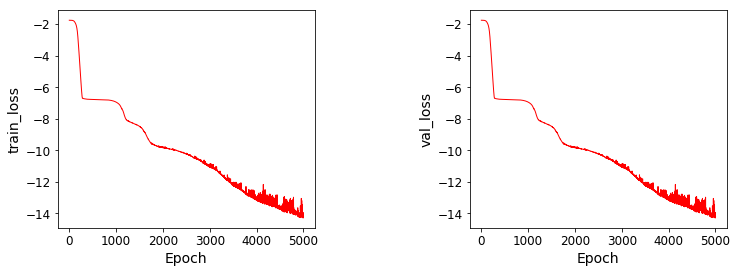

In [9]:
fig, axs = plt.subplots(1, 2, gridspec_kw={'wspace': 0.6, 'hspace': 0.6}, figsize=(12, 4))
axs = axs.flatten()
for i, metric_name in enumerate(('train_loss', 'val_loss')):
    ax = axs[i]
    for model_history in history.values():
        metric = model_history[metric_name]
        ax.plot(metric, 'r-', lw=1)
    ax.set_xlabel('Epoch')
    ax.set_ylabel(metric_name)
plt.show()

In [10]:
generated_path = model.get_path()
generated_path += path[0] - generated_path[0]

generated_path = signature_inversion.get_tree_reduced(generated_path, tol=0.01)

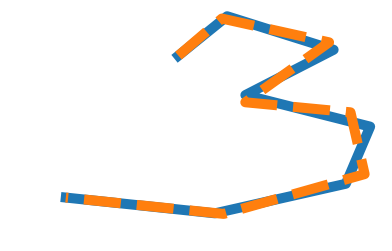

In [11]:
plt.plot(*path.T, label="Original path", linewidth=10, linestyle="-")
plt.plot(*generated_path.T, label="Generated path", linewidth=10, linestyle="--")
plt.axis('off')
plt.show()